[*********************100%***********************]  1 of 1 completed


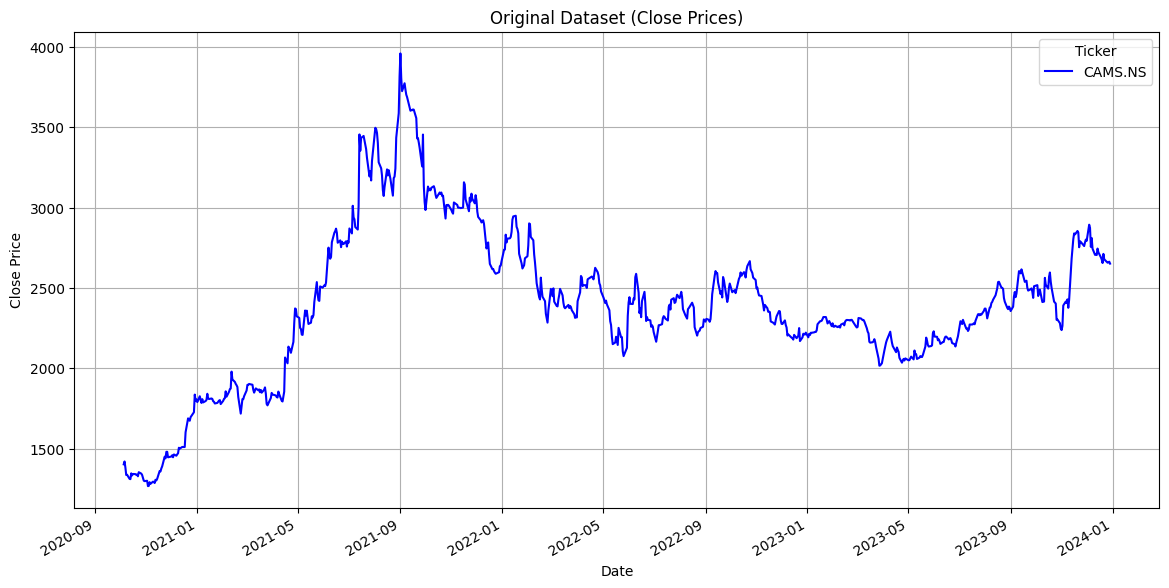

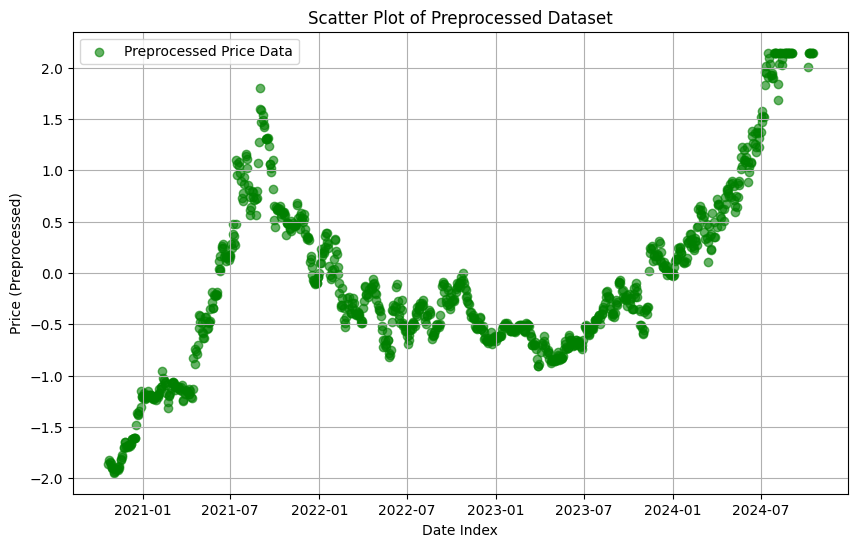

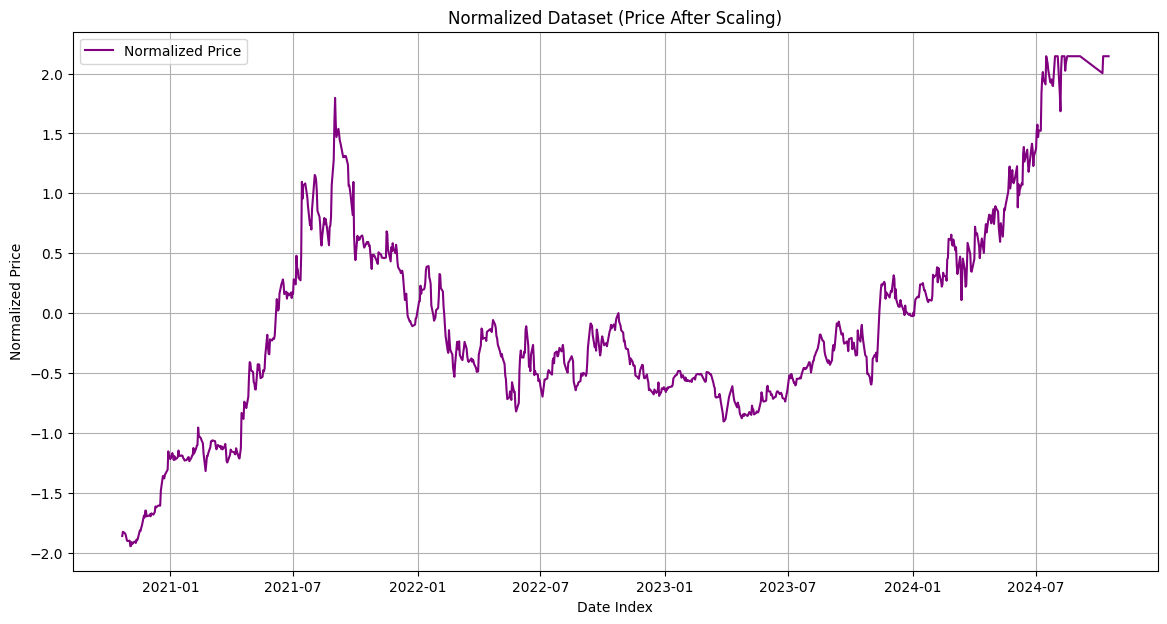

In [ ]:
import matplotlib.pyplot as plt

# 1. Plot for the Original Dataset
original_data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
original_data['Close'].plot(figsize=(14, 7), title="Original Dataset (Close Prices)", color='blue')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid()
plt.show()

# 2. Scatter Plot for Preprocessed Data
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['price'], alpha=0.6, color='green', label='Preprocessed Price Data')
plt.title("Scatter Plot of Preprocessed Dataset")
plt.xlabel("Date Index")
plt.ylabel("Price (Preprocessed)")
plt.grid()
plt.legend()
plt.show()

# 3. Plot for Normalized Dataset
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['price'], color='purple', label='Normalized Price')
plt.title("Normalized Dataset (Price After Scaling)")
plt.xlabel("Date Index")
plt.ylabel("Normalized Price")
plt.grid()
plt.legend()
plt.show()


MODEL 1:


1.   GRU -> mse
2.   lstm -> mae
3.   linear regression








In [ ]:
import matplotlib.pyplot as plt

# 1. Plot for the Original Dataset
original_data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
original_data['Close'].plot(figsize=(112, 7), title="Original Dataset (Close Prices)", color='blue')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid()
plt.show()

# 2. Scatter Plot for Preprocessed Data
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['price'], alpha=0.6, color='green', label='Preprocessed Price Data')
plt.title("Scatter Plot of Preprocessed Dataset")
plt.xlabel("Date Index")
plt.ylabel("Price (Preprocessed)")
plt.grid()
plt.legend()
plt.show()

# 3. Plot for Normalized Dataset
plt.figure(figsize=(12, 7))
plt.plot(data.index, data['price'], color='purple', label='Normalized Price')
plt.title("Normalized Dataset (Price After Scaling)")
plt.xlabel("Date Index")
plt.ylabel("Normalized Price")
plt.grid()
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-30bbb0a7fe1f>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.6772
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0526
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0166
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0109
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0069
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0062
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0060
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0062
Epoch 11/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0058
Epoch 12/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055
Epoch 13/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049
Epoch 14/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081
Epoch 15/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/s

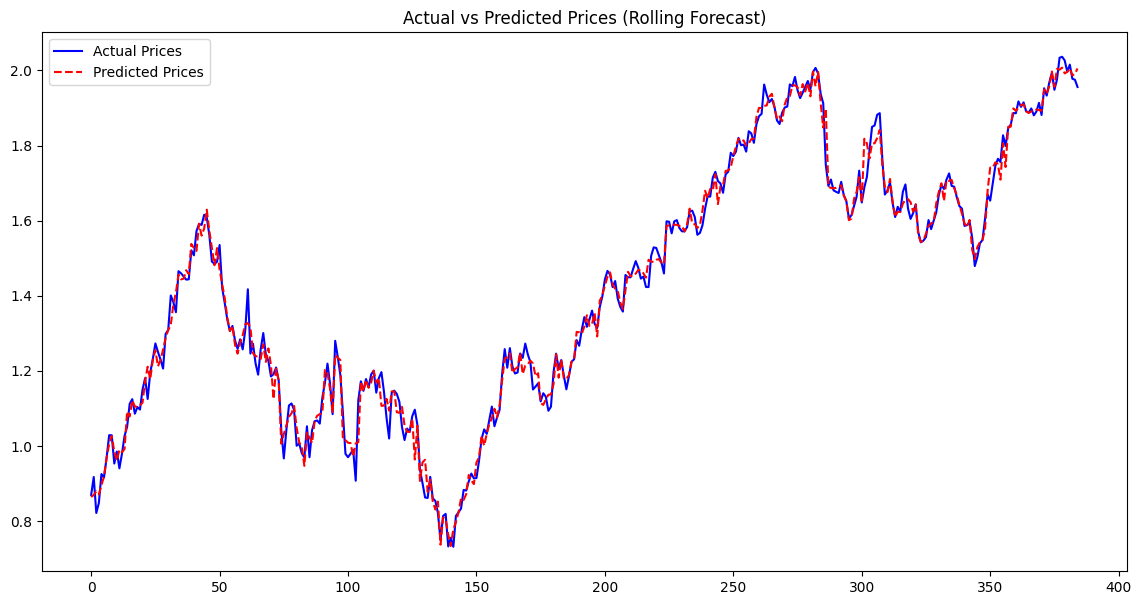

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch Stock Data
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.rename(columns={'Close': 'price'}, inplace=True)

# Preprocessing
data.fillna(method='ffill', inplace=True)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)

scaler = StandardScaler()
data[['Open', 'High', 'Low', 'price', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'price', 'Volume']])

# Add Technical Indicators
data['moving_avg'] = data['price'].rolling(window=5).mean()
delta = data['price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['rsi'] = 100 - (100 / (1 + rs))
data['volatility'] = data['price'].rolling(window=5).std()
data.dropna(inplace=True)

# Target for 7-day price prediction
features = ['Open', 'High', 'Low', 'Volume', 'moving_avg', 'rsi', 'volatility']
target = 'price'
data['target'] = data['price'].shift(-7)  # Predict 7 days ahead
data.dropna(inplace=True)

X = data[features].values
y = data['target'].values

# Rolling Forecast Parameters
window_size = 60
forecast_horizon = 7

# LightGBM Dataset Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
lgb_train = lgb.Dataset(X_train, label=y_train)

# Build GRU and LSTM Models
def build_deep_learning_model(input_shape):
    input_layer = Input(shape=(input_shape, 1))

    # GRU block
    gru_output = GRU(32, activation='relu', return_sequences=False)(input_layer)

    # LSTM block
    lstm_output = LSTM(32, activation='relu', return_sequences=False)(input_layer)

    # Sum outputs
    combined = Dense(32, activation='relu')(gru_output + lstm_output)
    output = Dense(1)(combined)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # For GRU

    return model

# Train GRU and LSTM Models
X_deep = X_train.reshape(-1, X_train.shape[1], 1)  # Reshape for GRU/LSTM
gru_model = build_deep_learning_model(X_train.shape[1])
gru_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

lstm_model = build_deep_learning_model(X_train.shape[1])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')  # Correlation Loss (approximation)
lstm_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

# LightGBM Training
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'verbose': -1
}
lgbm_model = lgb.train(lgb_params, lgb_train, num_boost_round=500)

# Linear Regression Integration
lr_model = LinearRegression()

# Rolling Forecast
predictions = []
actuals = []

for start in range(0, len(X_test) - window_size - forecast_horizon, forecast_horizon):
    X_train_roll = X_test[start: start + window_size]
    y_train_roll = y_test[start: start + window_size]
    X_test_roll = X_test[start + window_size: start + window_size + forecast_horizon]
    y_test_roll = y_test[start + window_size: start + window_size + forecast_horizon]

    # Train GRU
    X_train_deep = X_train_roll.reshape(-1, X_train_roll.shape[1], 1)
    gru_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    gru_preds = gru_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LSTM
    lstm_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    lstm_preds = lstm_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LightGBM
    lgb_train_roll = lgb.Dataset(X_train_roll, label=y_train_roll)
    lgbm_model = lgb.train(lgb_params, lgb_train_roll, num_boost_round=100)
    lgbm_preds = lgbm_model.predict(X_test_roll)

    # Train Linear Regression
    combined_features = np.column_stack((gru_preds, lstm_preds, lgbm_preds))
    lr_model.fit(combined_features, y_test_roll)
    final_preds = lr_model.predict(combined_features)

    predictions.extend(final_preds)
    actuals.extend(y_test_roll)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Rolling Forecast RMSE: {rmse}")

# Plot Predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(range(len(actuals)), actuals, label="Actual Prices", color="blue")
plt.plot(range(len(predictions)), predictions, label="Predicted Prices", color="red", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Prices (Rolling Forecast)")
plt.show()


MODEL 2:



1.   GRU (mse)
2.   LSTM (CORRELEATION LOSS)
3.   lINEAR REGRESSION



In [ ]:
import tensorflow.keras.backend as K

def correlation_loss(y_true, y_pred):
    # Mean-centered predictions and labels
    y_true_mean = K.mean(y_true)
    y_pred_mean = K.mean(y_pred)

    # Covariance
    covariance = K.mean((y_true - y_true_mean) * (y_pred - y_pred_mean))

    # Standard deviations
    std_y_true = K.std(y_true)
    std_y_pred = K.std(y_pred)

    # Correlation coefficient
    correlation = covariance / (std_y_true * std_y_pred + K.epsilon())

    # Return negative correlation as loss (maximize correlation by minimizing negative)
    return 1 - correlation


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



<ipython-input-3-ae9b586c2c20>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.6226
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0437
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065
Epoch 11/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0063
Epoch 12/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0109
Epoch 13/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0061
Epoch 14/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0073
Epoch 15/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.005

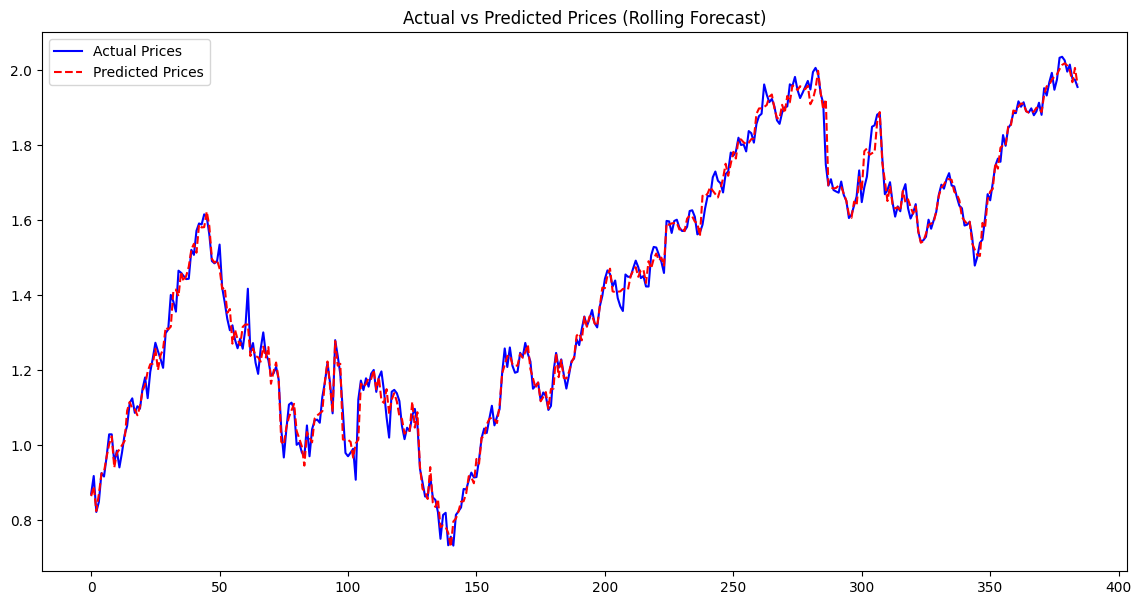

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch Stock Data
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.rename(columns={'Close': 'price'}, inplace=True)

# Preprocessing
data.fillna(method='ffill', inplace=True)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)

scaler = StandardScaler()
data[['Open', 'High', 'Low', 'price', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'price', 'Volume']])

# Add Technical Indicators
data['moving_avg'] = data['price'].rolling(window=5).mean()
delta = data['price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['rsi'] = 100 - (100 / (1 + rs))
data['volatility'] = data['price'].rolling(window=5).std()
data.dropna(inplace=True)

# Target for 7-day price prediction
features = ['Open', 'High', 'Low', 'Volume', 'moving_avg', 'rsi', 'volatility']
target = 'price'
data['target'] = data['price'].shift(-7)  # Predict 7 days ahead
data.dropna(inplace=True)

X = data[features].values
y = data['target'].values

# Rolling Forecast Parameters
window_size = 60
forecast_horizon = 7

# LightGBM Dataset Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
lgb_train = lgb.Dataset(X_train, label=y_train)

# Build GRU and LSTM Models
def build_deep_learning_model(input_shape):
    input_layer = Input(shape=(input_shape, 1))

    # GRU block
    gru_output = GRU(32, activation='relu', return_sequences=False)(input_layer)

    # LSTM block
    lstm_output = LSTM(32, activation='relu', return_sequences=False)(input_layer)

    # Sum outputs
    combined = Dense(32, activation='relu')(gru_output + lstm_output)
    output = Dense(1)(combined)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # For GRU

    return model

# Train GRU and LSTM Models
X_deep = X_train.reshape(-1, X_train.shape[1], 1)  # Reshape for GRU/LSTM
gru_model = build_deep_learning_model(X_train.shape[1])
gru_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

lstm_model = build_deep_learning_model(X_train.shape[1])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss=correlation_loss)  # Correlation Loss (approximation)
lstm_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

# LightGBM Training
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'verbose': -1
}
lgbm_model = lgb.train(lgb_params, lgb_train, num_boost_round=500)

# Linear Regression Integration
lr_model = LinearRegression()

# Rolling Forecast
predictions = []
actuals = []

for start in range(0, len(X_test) - window_size - forecast_horizon, forecast_horizon):
    X_train_roll = X_test[start: start + window_size]
    y_train_roll = y_test[start: start + window_size]
    X_test_roll = X_test[start + window_size: start + window_size + forecast_horizon]
    y_test_roll = y_test[start + window_size: start + window_size + forecast_horizon]

    # Train GRU
    X_train_deep = X_train_roll.reshape(-1, X_train_roll.shape[1], 1)
    gru_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    gru_preds = gru_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LSTM
    lstm_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    lstm_preds = lstm_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LightGBM
    lgb_train_roll = lgb.Dataset(X_train_roll, label=y_train_roll)
    lgbm_model = lgb.train(lgb_params, lgb_train_roll, num_boost_round=100)
    lgbm_preds = lgbm_model.predict(X_test_roll)

    # Train Linear Regression
    combined_features = np.column_stack((gru_preds, lstm_preds, lgbm_preds))
    lr_model.fit(combined_features, y_test_roll)
    final_preds = lr_model.predict(combined_features)

    predictions.extend(final_preds)
    actuals.extend(y_test_roll)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Rolling Forecast RMSE: {rmse}")

# Plot Predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(range(len(actuals)), actuals, label="Actual Prices", color="blue")
plt.plot(range(len(predictions)), predictions, label="Predicted Prices", color="red", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Prices (Rolling Forecast)")
plt.show()


MODEL 3



1.   LSTM (CORRELATION)
2.   GRU (MSE)
3.   Ridge Regression

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



<ipython-input-4-85f9256df4c5>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 3.6494
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0454
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0275
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0145
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0118
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0053
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0049
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0049
Epoch 11/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0043
Epoch 12/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0046
Epoch 13/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049
Epoch 14/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040
Epoch 15/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049

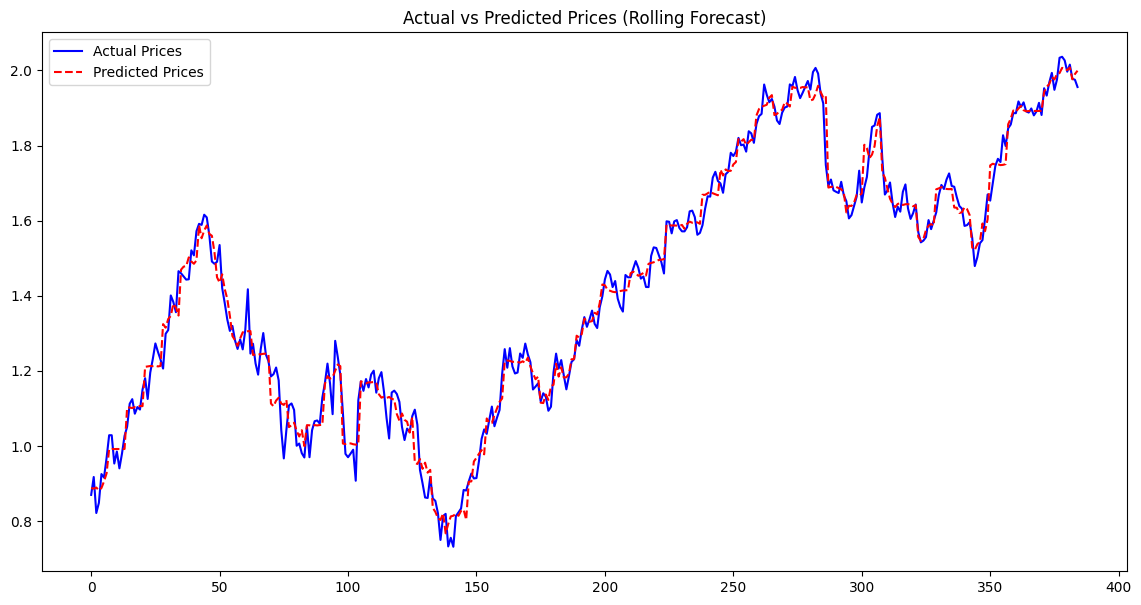

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch Stock Data
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.rename(columns={'Close': 'price'}, inplace=True)

# Preprocessing
data.fillna(method='ffill', inplace=True)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)

scaler = StandardScaler()
data[['Open', 'High', 'Low', 'price', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'price', 'Volume']])

# Add Technical Indicators
data['moving_avg'] = data['price'].rolling(window=5).mean()
delta = data['price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['rsi'] = 100 - (100 / (1 + rs))
data['volatility'] = data['price'].rolling(window=5).std()
data.dropna(inplace=True)

# Target for 7-day price prediction
features = ['Open', 'High', 'Low', 'Volume', 'moving_avg', 'rsi', 'volatility']
target = 'price'
data['target'] = data['price'].shift(-7)  # Predict 7 days ahead
data.dropna(inplace=True)

X = data[features].values
y = data['target'].values

# Rolling Forecast Parameters
window_size = 60
forecast_horizon = 7

# LightGBM Dataset Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
lgb_train = lgb.Dataset(X_train, label=y_train)

# Build GRU and LSTM Models
def build_deep_learning_model(input_shape):
    input_layer = Input(shape=(input_shape, 1))

    # GRU block
    gru_output = GRU(32, activation='relu', return_sequences=False)(input_layer)

    # LSTM block
    lstm_output = LSTM(32, activation='relu', return_sequences=False)(input_layer)

    # Sum outputs
    combined = Dense(32, activation='relu')(gru_output + lstm_output)
    output = Dense(1)(combined)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # For GRU

    return model

# Train GRU and LSTM Models
X_deep = X_train.reshape(-1, X_train.shape[1], 1)  # Reshape for GRU/LSTM
gru_model = build_deep_learning_model(X_train.shape[1])
gru_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

lstm_model = build_deep_learning_model(X_train.shape[1])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss=correlation_loss)  # Correlation Loss (approximation)
lstm_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

# LightGBM Training
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'verbose': -1
}
lgbm_model = lgb.train(lgb_params, lgb_train, num_boost_round=500)

# Linear Regression Integration
#lr_model = LinearRegression()
# Ridge Regression Integration
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength


# Rolling Forecast
predictions = []
actuals = []

for start in range(0, len(X_test) - window_size - forecast_horizon, forecast_horizon):
    X_train_roll = X_test[start: start + window_size]
    y_train_roll = y_test[start: start + window_size]
    X_test_roll = X_test[start + window_size: start + window_size + forecast_horizon]
    y_test_roll = y_test[start + window_size: start + window_size + forecast_horizon]

    # Train GRU
    X_train_deep = X_train_roll.reshape(-1, X_train_roll.shape[1], 1)
    gru_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    gru_preds = gru_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LSTM
    lstm_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    lstm_preds = lstm_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LightGBM
    lgb_train_roll = lgb.Dataset(X_train_roll, label=y_train_roll)
    lgbm_model = lgb.train(lgb_params, lgb_train_roll, num_boost_round=100)
    lgbm_preds = lgbm_model.predict(X_test_roll)

    # Train Linear Regression
    combined_features = np.column_stack((gru_preds, lstm_preds, lgbm_preds))
    ridge_model.fit(combined_features, y_test_roll)
    final_preds = ridge_model.predict(combined_features)

    predictions.extend(final_preds)
    actuals.extend(y_test_roll)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Rolling Forecast RMSE: {rmse}")

# Plot Predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(range(len(actuals)), actuals, label="Actual Prices", color="blue")
plt.plot(range(len(predictions)), predictions, label="Predicted Prices", color="red", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Prices (Rolling Forecast)")
plt.show()


NEW MODEL 4
changes made


1.   LSTM -> MAE
2.   GRU -> MSE
3.   RIDGE REGRESSION




[*********************100%***********************]  1 of 1 completed

Epoch 1/20



<ipython-input-16-1bac32f83983>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.8996
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0542
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0219
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0168
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0103
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0074
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0067
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0080
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0086
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0059
Epoch 11/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0058
Epoch 12/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0061
Epoch 13/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068
Epoch 14/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053
Epoch 15/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061


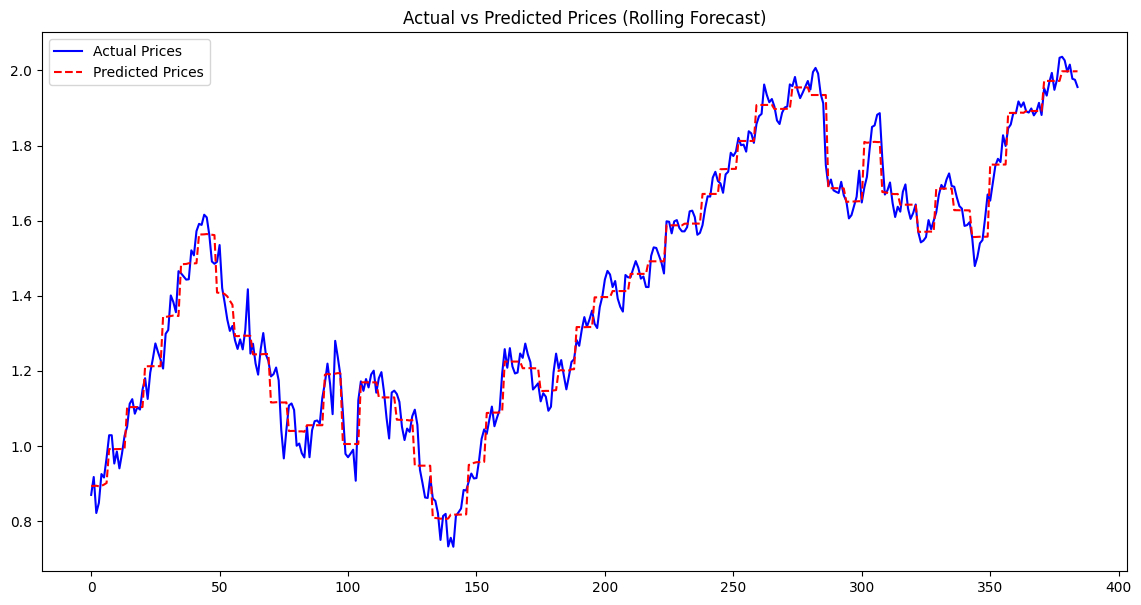

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch Stock Data
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.rename(columns={'Close': 'price'}, inplace=True)

# Preprocessing
data.fillna(method='ffill', inplace=True)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)

scaler = StandardScaler()
data[['Open', 'High', 'Low', 'price', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'price', 'Volume']])

# Add Technical Indicators
data['moving_avg'] = data['price'].rolling(window=5).mean()
delta = data['price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['rsi'] = 100 - (100 / (1 + rs))
data['volatility'] = data['price'].rolling(window=5).std()
data.dropna(inplace=True)

# Target for 7-day price prediction
features = ['Open', 'High', 'Low', 'Volume', 'moving_avg', 'rsi', 'volatility']
target = 'price'
data['target'] = data['price'].shift(-7)  # Predict 7 days ahead
data.dropna(inplace=True)

X = data[features].values
y = data['target'].values

# Rolling Forecast Parameters
window_size = 60
forecast_horizon = 7

# LightGBM Dataset Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
lgb_train = lgb.Dataset(X_train, label=y_train)

# Build GRU and LSTM Models
def build_deep_learning_model(input_shape):
    input_layer = Input(shape=(input_shape, 1))

    # GRU block
    gru_output = GRU(32, activation='relu', return_sequences=False)(input_layer)

    # LSTM block
    lstm_output = LSTM(32, activation='relu', return_sequences=False)(input_layer)

    # Sum outputs
    combined = Dense(32, activation='relu')(gru_output + lstm_output)
    output = Dense(1)(combined)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # For GRU

    return model

# Train GRU and LSTM Models
X_deep = X_train.reshape(-1, X_train.shape[1], 1)  # Reshape for GRU/LSTM
gru_model = build_deep_learning_model(X_train.shape[1])
gru_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

lstm_model = build_deep_learning_model(X_train.shape[1])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')  # Correlation Loss (approximation)
lstm_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

# LightGBM Training
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'verbose': -1
}
lgbm_model = lgb.train(lgb_params, lgb_train, num_boost_round=500)

# Linear Regression Integration
gr_model = Ridge(alpha=1.0)  # Alpha is the regularization strength

# Rolling Forecast
predictions = []
actuals = []

for start in range(0, len(X_test) - window_size - forecast_horizon, forecast_horizon):
    X_train_roll = X_test[start: start + window_size]
    y_train_roll = y_test[start: start + window_size]
    X_test_roll = X_test[start + window_size: start + window_size + forecast_horizon]
    y_test_roll = y_test[start + window_size: start + window_size + forecast_horizon]

    # Train GRU
    X_train_deep = X_train_roll.reshape(-1, X_train_roll.shape[1], 1)
    gru_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    gru_preds = gru_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LSTM
    lstm_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    lstm_preds = lstm_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LightGBM
    lgb_train_roll = lgb.Dataset(X_train_roll, label=y_train_roll)
    lgbm_model = lgb.train(lgb_params, lgb_train_roll, num_boost_round=100)
    lgbm_preds = lgbm_model.predict(X_test_roll)

    # Train Linear Regression
    combined_features = np.column_stack((gru_preds, lstm_preds, lgbm_preds))
    ridge_model.fit(combined_features, y_test_roll)
    final_preds = ridge_model.predict(combined_features)

    predictions.extend(final_preds)
    actuals.extend(y_test_roll)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Rolling Forecast RMSE: {rmse}")

# Plot Predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(range(len(actuals)), actuals, label="Actual Prices", color="blue")
plt.plot(range(len(predictions)), predictions, label="Predicted Prices", color="red", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Prices (Rolling Forecast)")
plt.show()


MODEL 5:



1.   LSTM -> CORRELATION LOSS
2.   GRU ->  CORRELATION LOSS
3.   LINEAR REGRESSION



        first correleation function defining for gru/LSTM

In [ ]:
import tensorflow.keras.backend as K

def correlation_loss(y_true, y_pred):
    y_true_mean = K.mean(y_true)
    y_pred_mean = K.mean(y_pred)

    covariance = K.mean((y_true - y_true_mean) * (y_pred - y_pred_mean))
    std_y_true = K.std(y_true)
    std_y_pred = K.std(y_pred)

    correlation = covariance / (std_y_true * std_y_pred + K.epsilon())
    return 1 - correlation


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



<ipython-input-10-dcc0e3774ee5>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.4000
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0314
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0101
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0056
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0047
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0038
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0036
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035
Epoch 11/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030
Epoch 12/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034
Epoch 13/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039
Epoch 14/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029
Epoch 15/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0

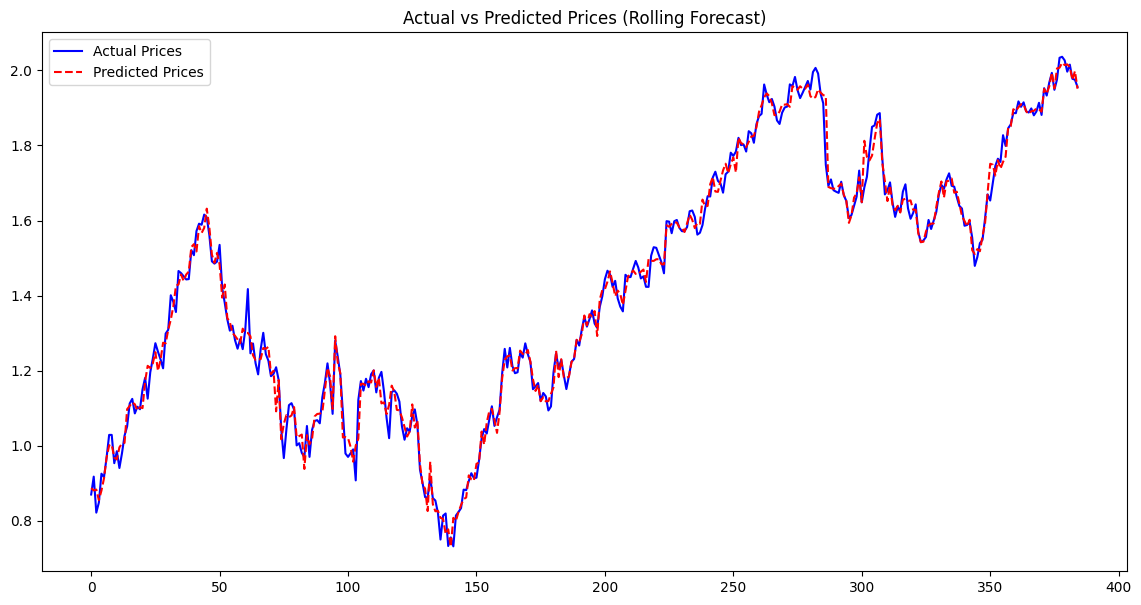

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch Stock Data
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.rename(columns={'Close': 'price'}, inplace=True)

# Preprocessing
data.fillna(method='ffill', inplace=True)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)

scaler = StandardScaler()
data[['Open', 'High', 'Low', 'price', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'price', 'Volume']])

# Add Technical Indicators
data['moving_avg'] = data['price'].rolling(window=5).mean()
delta = data['price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['rsi'] = 100 - (100 / (1 + rs))
data['volatility'] = data['price'].rolling(window=5).std()
data.dropna(inplace=True)

# Target for 7-day price prediction
features = ['Open', 'High', 'Low', 'Volume', 'moving_avg', 'rsi', 'volatility']
target = 'price'
data['target'] = data['price'].shift(-7)  # Predict 7 days ahead
data.dropna(inplace=True)

X = data[features].values
y = data['target'].values

# Rolling Forecast Parameters
window_size = 60
forecast_horizon = 7

# LightGBM Dataset Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
lgb_train = lgb.Dataset(X_train, label=y_train)

# Build GRU and LSTM Models
def build_deep_learning_model(input_shape):
    input_layer = Input(shape=(input_shape, 1))

    # GRU block
    gru_output = GRU(32, activation='relu', return_sequences=False)(input_layer)

    # LSTM block
    lstm_output = LSTM(32, activation='relu', return_sequences=False)(input_layer)

    # Sum outputs
    combined = Dense(32, activation='relu')(gru_output + lstm_output)
    output = Dense(1)(combined)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss= correlation_loss)  #  For GRU

    return model

# Train GRU and LSTM Models
X_deep = X_train.reshape(-1, X_train.shape[1], 1)  # Reshape for GRU/LSTM
gru_model = build_deep_learning_model(X_train.shape[1])
gru_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

lstm_model = build_deep_learning_model(X_train.shape[1])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')  # Correlation Loss (approximation)
lstm_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

# LightGBM Training
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'verbose': -1
}
lgbm_model = lgb.train(lgb_params, lgb_train, num_boost_round=500)

# Linear Regression Integration
lr_model = LinearRegression()

# Rolling Forecast
predictions = []
actuals = []

for start in range(0, len(X_test) - window_size - forecast_horizon, forecast_horizon):
    X_train_roll = X_test[start: start + window_size]
    y_train_roll = y_test[start: start + window_size]
    X_test_roll = X_test[start + window_size: start + window_size + forecast_horizon]
    y_test_roll = y_test[start + window_size: start + window_size + forecast_horizon]

    # Train GRU
    X_train_deep = X_train_roll.reshape(-1, X_train_roll.shape[1], 1)
    gru_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    gru_preds = gru_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LSTM
    lstm_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    lstm_preds = lstm_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LightGBM
    lgb_train_roll = lgb.Dataset(X_train_roll, label=y_train_roll)
    lgbm_model = lgb.train(lgb_params, lgb_train_roll, num_boost_round=100)
    lgbm_preds = lgbm_model.predict(X_test_roll)

    # Train Linear Regression
    combined_features = np.column_stack((gru_preds, lstm_preds, lgbm_preds))
    lr_model.fit(combined_features, y_test_roll)
    final_preds = lr_model.predict(combined_features)

    predictions.extend(final_preds)
    actuals.extend(y_test_roll)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Rolling Forecast RMSE: {rmse}")

# Plot Predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(range(len(actuals)), actuals, label="Actual Prices", color="blue")
plt.plot(range(len(predictions)), predictions, label="Predicted Prices", color="red", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Prices (Rolling Forecast)")
plt.show()


MODEL 6


1.   LSTM -> CORRELEATION
2.   GRU  -> CORRELEATION
3.  RIDGE REGRESSION



In [ ]:
import tensorflow.keras.backend as K

def correlation_loss(y_true, y_pred):
    y_true_mean = K.mean(y_true)
    y_pred_mean = K.mean(y_pred)

    covariance = K.mean((y_true - y_true_mean) * (y_pred - y_pred_mean))
    std_y_true = K.std(y_true)
    std_y_pred = K.std(y_pred)

    correlation = covariance / (std_y_true * std_y_pred + K.epsilon())
    return 1 - correlation


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



<ipython-input-12-980a18fe6ec1>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.5582
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0340
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0082
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0039
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0064
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033
Epoch 11/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038
Epoch 12/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052
Epoch 13/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031
Epoch 14/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029
Epoch 15/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.00

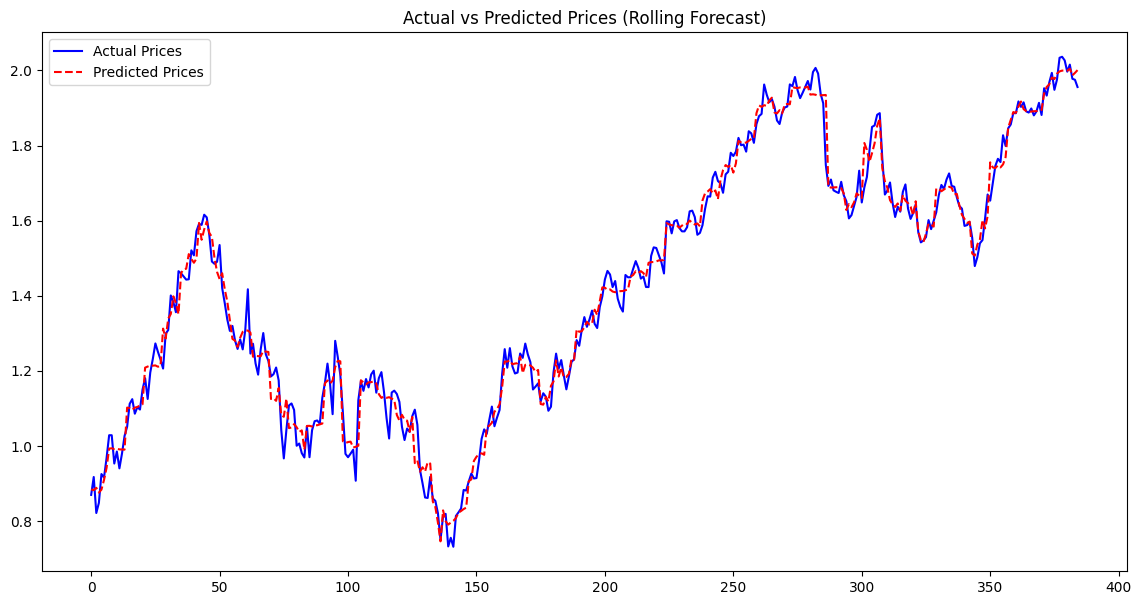

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch Stock Data
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.rename(columns={'Close': 'price'}, inplace=True)

# Preprocessing
data.fillna(method='ffill', inplace=True)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)

scaler = StandardScaler()
data[['Open', 'High', 'Low', 'price', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'price', 'Volume']])

# Add Technical Indicators
data['moving_avg'] = data['price'].rolling(window=5).mean()
delta = data['price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['rsi'] = 100 - (100 / (1 + rs))
data['volatility'] = data['price'].rolling(window=5).std()
data.dropna(inplace=True)

# Target for 7-day price prediction
features = ['Open', 'High', 'Low', 'Volume', 'moving_avg', 'rsi', 'volatility']
target = 'price'
data['target'] = data['price'].shift(-7)  # Predict 7 days ahead
data.dropna(inplace=True)

X = data[features].values
y = data['target'].values

# Rolling Forecast Parameters
window_size = 60
forecast_horizon = 7

# LightGBM Dataset Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
lgb_train = lgb.Dataset(X_train, label=y_train)

# Build GRU and LSTM Models
def build_deep_learning_model(input_shape):
    input_layer = Input(shape=(input_shape, 1))

    # GRU block
    gru_output = GRU(32, activation='relu', return_sequences=False)(input_layer)

    # LSTM block
    lstm_output = LSTM(32, activation='relu', return_sequences=False)(input_layer)

    # Sum outputs
    combined = Dense(32, activation='relu')(gru_output + lstm_output)
    output = Dense(1)(combined)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss= correlation_loss)  # For GRU

    return model

# Train GRU and LSTM Models
X_deep = X_train.reshape(-1, X_train.shape[1], 1)  # Reshape for GRU/LSTM
gru_model = build_deep_learning_model(X_train.shape[1])
gru_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

lstm_model = build_deep_learning_model(X_train.shape[1])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss= correlation_loss)  # Correlation Loss (approximation)
lstm_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

# LightGBM Training
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'verbose': -1
}
lgbm_model = lgb.train(lgb_params, lgb_train, num_boost_round=500)

# Linear Regression Integration
gr_model = Ridge(alpha=1.0)  # Alpha is the regularization strength

# Rolling Forecast
predictions = []
actuals = []

for start in range(0, len(X_test) - window_size - forecast_horizon, forecast_horizon):
    X_train_roll = X_test[start: start + window_size]
    y_train_roll = y_test[start: start + window_size]
    X_test_roll = X_test[start + window_size: start + window_size + forecast_horizon]
    y_test_roll = y_test[start + window_size: start + window_size + forecast_horizon]

    # Train GRU
    X_train_deep = X_train_roll.reshape(-1, X_train_roll.shape[1], 1)
    gru_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    gru_preds = gru_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LSTM
    lstm_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    lstm_preds = lstm_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LightGBM
    lgb_train_roll = lgb.Dataset(X_train_roll, label=y_train_roll)
    lgbm_model = lgb.train(lgb_params, lgb_train_roll, num_boost_round=100)
    lgbm_preds = lgbm_model.predict(X_test_roll)

    # Train Linear Regression
    combined_features = np.column_stack((gru_preds, lstm_preds, lgbm_preds))
    ridge_model.fit(combined_features, y_test_roll)
    final_preds = ridge_model.predict(combined_features)

    predictions.extend(final_preds)
    actuals.extend(y_test_roll)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Rolling Forecast RMSE: {rmse}")

# Plot Predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(range(len(actuals)), actuals, label="Actual Prices", color="blue")
plt.plot(range(len(predictions)), predictions, label="Predicted Prices", color="red", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Prices (Rolling Forecast)")
plt.show()


MODEL 7 :


1.   LSTM -> MAE
2.   GRU  -> CORRELEATION
3.   LINEAR REGRESSION



In [ ]:
import tensorflow.keras.backend as K

def correlation_loss(y_true, y_pred):
    y_true_mean = K.mean(y_true)
    y_pred_mean = K.mean(y_pred)

    covariance = K.mean((y_true - y_true_mean) * (y_pred - y_pred_mean))
    std_y_true = K.std(y_true)
    std_y_pred = K.std(y_pred)

    correlation = covariance / (std_y_true * std_y_pred + K.epsilon())
    return 1 - correlation


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



<ipython-input-14-d923050c05f0>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4603
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0291
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0086
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0037
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0047
Epoch 9/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0029
Epoch 10/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0033
Epoch 11/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0037
Epoch 12/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035
Epoch 13/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0035
Epoch 14/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0034
Epoch 15/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032

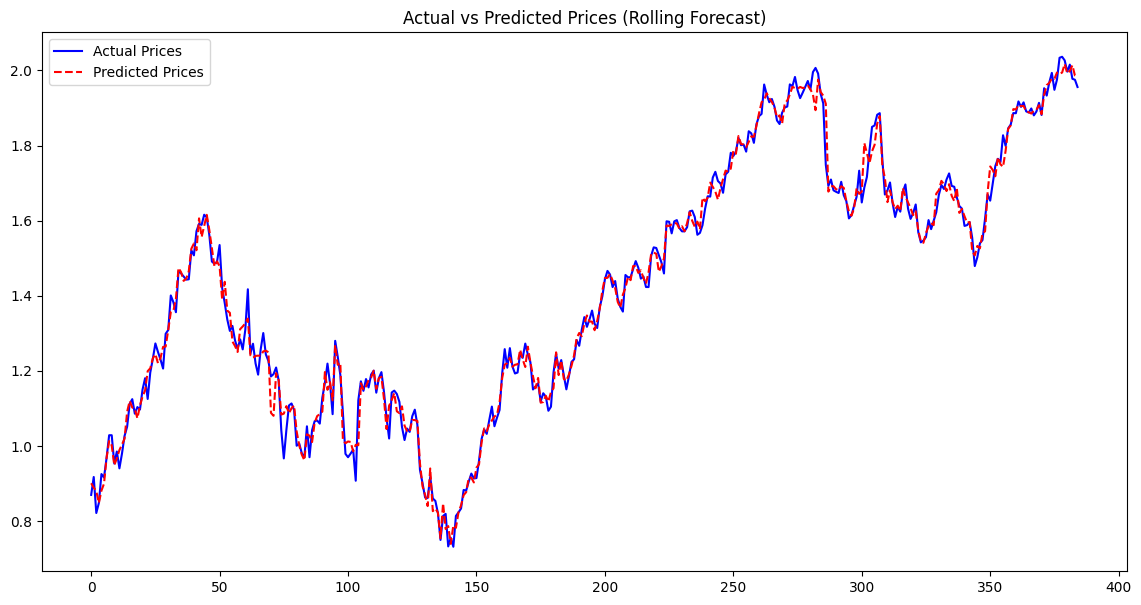

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch Stock Data
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.rename(columns={'Close': 'price'}, inplace=True)

# Preprocessing
data.fillna(method='ffill', inplace=True)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)

scaler = StandardScaler()
data[['Open', 'High', 'Low', 'price', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'price', 'Volume']])

# Add Technical Indicators
data['moving_avg'] = data['price'].rolling(window=5).mean()
delta = data['price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['rsi'] = 100 - (100 / (1 + rs))
data['volatility'] = data['price'].rolling(window=5).std()
data.dropna(inplace=True)

# Target for 7-day price prediction
features = ['Open', 'High', 'Low', 'Volume', 'moving_avg', 'rsi', 'volatility']
target = 'price'
data['target'] = data['price'].shift(-7)  # Predict 7 days ahead
data.dropna(inplace=True)

X = data[features].values
y = data['target'].values

# Rolling Forecast Parameters
window_size = 60
forecast_horizon = 7

# LightGBM Dataset Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
lgb_train = lgb.Dataset(X_train, label=y_train)

# Build GRU and LSTM Models
def build_deep_learning_model(input_shape):
    input_layer = Input(shape=(input_shape, 1))

    # GRU block
    gru_output = GRU(32, activation='relu', return_sequences=False)(input_layer)

    # LSTM block
    lstm_output = LSTM(32, activation='relu', return_sequences=False)(input_layer)

    # Sum outputs
    combined = Dense(32, activation='relu')(gru_output + lstm_output)
    output = Dense(1)(combined)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss= correlation_loss)  # For GRU

    return model

# Train GRU and LSTM Models
X_deep = X_train.reshape(-1, X_train.shape[1], 1)  # Reshape for GRU/LSTM
gru_model = build_deep_learning_model(X_train.shape[1])
gru_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

lstm_model = build_deep_learning_model(X_train.shape[1])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')  # Correlation Loss (approximation)
lstm_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

# LightGBM Training
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'verbose': -1
}
lgbm_model = lgb.train(lgb_params, lgb_train, num_boost_round=500)

# Linear Regression Integration
lr_model = LinearRegression()

# Rolling Forecast
predictions = []
actuals = []

for start in range(0, len(X_test) - window_size - forecast_horizon, forecast_horizon):
    X_train_roll = X_test[start: start + window_size]
    y_train_roll = y_test[start: start + window_size]
    X_test_roll = X_test[start + window_size: start + window_size + forecast_horizon]
    y_test_roll = y_test[start + window_size: start + window_size + forecast_horizon]

    # Train GRU
    X_train_deep = X_train_roll.reshape(-1, X_train_roll.shape[1], 1)
    gru_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    gru_preds = gru_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LSTM
    lstm_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    lstm_preds = lstm_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LightGBM
    lgb_train_roll = lgb.Dataset(X_train_roll, label=y_train_roll)
    lgbm_model = lgb.train(lgb_params, lgb_train_roll, num_boost_round=100)
    lgbm_preds = lgbm_model.predict(X_test_roll)

    # Train Linear Regression
    combined_features = np.column_stack((gru_preds, lstm_preds, lgbm_preds))
    lr_model.fit(combined_features, y_test_roll)
    final_preds = lr_model.predict(combined_features)

    predictions.extend(final_preds)
    actuals.extend(y_test_roll)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Rolling Forecast RMSE: {rmse}")

# Plot Predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(actuals)), actuals, label="Actual Prices", color="blue")
plt.plot(range(len(predictions)), predictions, label="Predicted Prices", color="red", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Prices (Rolling Forecast)")
plt.show()


adani green prediction

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-d64ebe9dd578>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3757
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1203
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0760
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0654
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0645
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0667
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0533
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0591
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0642
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0518
Epoch 13/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0467
Epoch 14/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460
Epoch 15/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454
Epoch 16/20
4

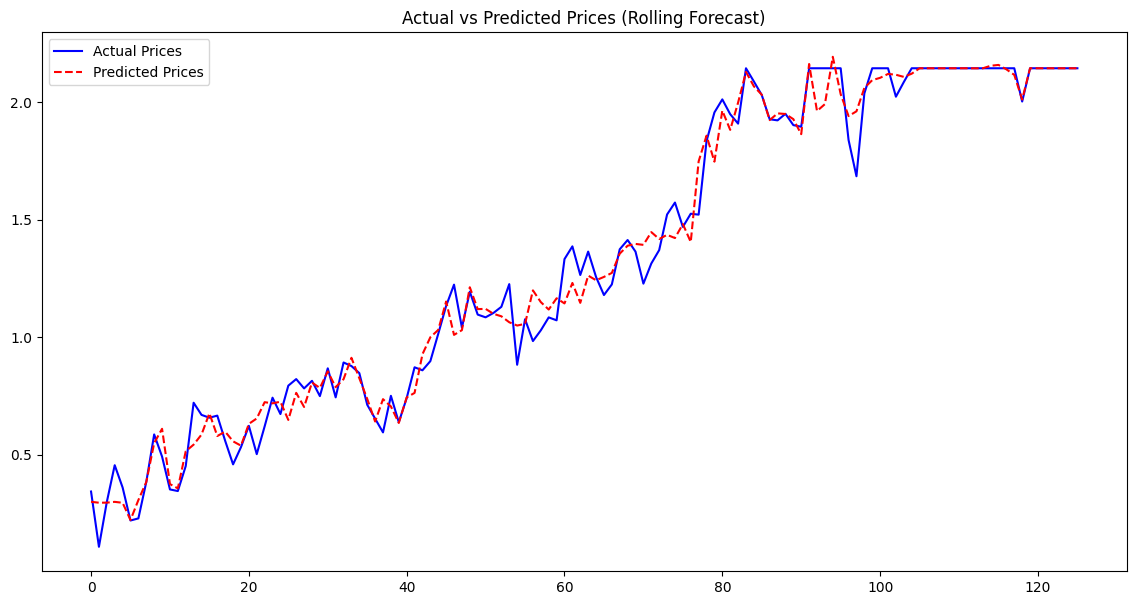

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fetch Stock Data
ticker = "CAMS.NS"
data = yf.download(ticker, start="2015-01-01", end="2024-12-13")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.rename(columns={'Close': 'price'}, inplace=True)

# Preprocessing
data.fillna(method='ffill', inplace=True)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)

scaler = StandardScaler()
data[['Open', 'High', 'Low', 'price', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'price', 'Volume']])

# Add Technical Indicators
data['moving_avg'] = data['price'].rolling(window=5).mean()
delta = data['price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['rsi'] = 100 - (100 / (1 + rs))
data['volatility'] = data['price'].rolling(window=5).std()
data.dropna(inplace=True)

# Target for 7-day price prediction
features = ['Open', 'High', 'Low', 'Volume', 'moving_avg', 'rsi', 'volatility']
target = 'price'
data['target'] = data['price'].shift(-7)  # Predict 7 days ahead
data.dropna(inplace=True)

X = data[features].values
y = data['target'].values

# Rolling Forecast Parameters
window_size = 60
forecast_horizon = 7

# LightGBM Dataset Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
lgb_train = lgb.Dataset(X_train, label=y_train)

# Build GRU and LSTM Models
def build_deep_learning_model(input_shape):
    input_layer = Input(shape=(input_shape, 1))

    # GRU block
    gru_output = GRU(32, activation='relu', return_sequences=False)(input_layer)

    # LSTM block
    lstm_output = LSTM(32, activation='relu', return_sequences=False)(input_layer)

    # Sum outputs
    combined = Dense(32, activation='relu')(gru_output + lstm_output)
    output = Dense(1)(combined)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # For GRU

    return model

# Train GRU and LSTM Models
X_deep = X_train.reshape(-1, X_train.shape[1], 1)  # Reshape for GRU/LSTM
gru_model = build_deep_learning_model(X_train.shape[1])
gru_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

lstm_model = build_deep_learning_model(X_train.shape[1])
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')  # Correlation Loss (approximation)
lstm_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=1)

# LightGBM Training
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'verbose': -1
}
lgbm_model = lgb.train(lgb_params, lgb_train, num_boost_round=500)

# Linear Regression Integration
lr_model = LinearRegression()

# Rolling Forecast
predictions = []
actuals = []

for start in range(0, len(X_test) - window_size - forecast_horizon, forecast_horizon):
    X_train_roll = X_test[start: start + window_size]
    y_train_roll = y_test[start: start + window_size]
    X_test_roll = X_test[start + window_size: start + window_size + forecast_horizon]
    y_test_roll = y_test[start + window_size: start + window_size + forecast_horizon]

    # Train GRU
    X_train_deep = X_train_roll.reshape(-1, X_train_roll.shape[1], 1)
    gru_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    gru_preds = gru_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LSTM
    lstm_model.fit(X_train_deep, y_train_roll, epochs=5, batch_size=16, verbose=0)
    lstm_preds = lstm_model.predict(X_test_roll.reshape(-1, X_test_roll.shape[1], 1))

    # Train LightGBM
    lgb_train_roll = lgb.Dataset(X_train_roll, label=y_train_roll)
    lgbm_model = lgb.train(lgb_params, lgb_train_roll, num_boost_round=100)
    lgbm_preds = lgbm_model.predict(X_test_roll)

    # Train Linear Regression
    combined_features = np.column_stack((gru_preds, lstm_preds, lgbm_preds))
    lr_model.fit(combined_features, y_test_roll)
    final_preds = lr_model.predict(combined_features)

    predictions.extend(final_preds)
    actuals.extend(y_test_roll)

# Evaluate Model
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print(f"Rolling Forecast RMSE: {rmse}")

# Plot Predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(range(len(actuals)), actuals, label="Actual Prices", color="blue")
plt.plot(range(len(predictions)), predictions, label="Predicted Prices", color="red", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Prices (Rolling Forecast)")
plt.show()


In [ ]:
############## TICKER SYMBOLS   ####################################

# List of 50 Indian companies' ticker symbols on Yahoo Finance
indian_ticker_symbols = [
    "RELIANCE.BO", "TCS.BO", "INFY.BO", "HDFCBANK.BO", "HDFC.BO",
    "ICICIBANK.BO", "SBIN.BO", "AXISBANK.BO", "KOTAKBANK.BO", "ITC.BO",
    "LT.BO", "BHARTIARTL.BO", "HINDUNILVR.BO", "ASIANPAINT.BO", "MARUTI.BO",
    "TATAMOTORS.BO", "HCLTECH.BO", "WIPRO.BO", "SUNPHARMA.BO", "DRREDDY.BO",
    "DIVISLAB.BO", "BAJFINANCE.BO", "BAJAJFINSV.BO", "POWERGRID.BO", "NTPC.BO",
    "ONGC.BO", "BPCL.BO", "IOC.BO", "M&M.BO", "HEROMOTOCO.BO",
    "EICHERMOT.BO", "BAJAJ-AUTO.BO", "JSWSTEEL.BO", "TATASTEEL.BO", "HINDALCO.BO",
    "COALINDIA.BO", "TECHM.BO", "PIDILITIND.BO", "DABUR.BO", "BRITANNIA.BO",
    "ULTRACEMCO.BO", "SHREECEM.BO", "ADANIPORTS.BO", "ADANIGREEN.BO", "ADANIENT.BO",
    "ZEEL.BO", "CIPLA.BO", "INDUSINDBK.BO", "GRASIM.BO", "TITAN.BO"
]


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Processing RELIANCE.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
RELIANCE.BO RMSE: 0.1140783717881048


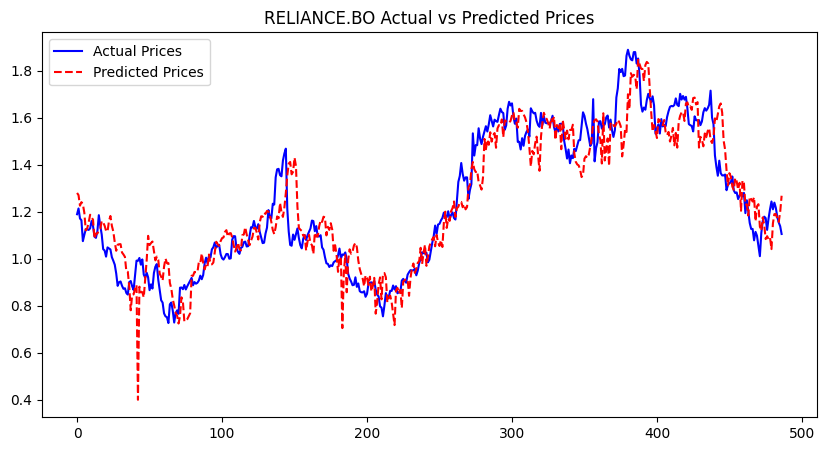

Processing TCS.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
TCS.BO RMSE: 0.1383532715803386


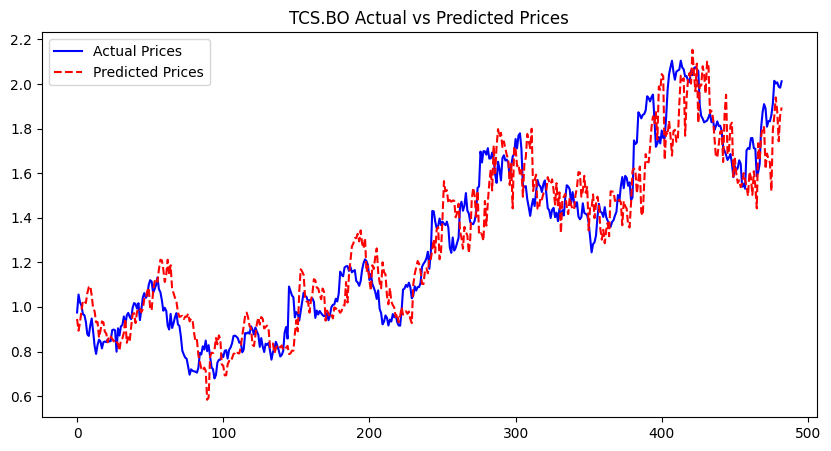

Processing INFY.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
INFY.BO RMSE: 0.1325218168095015


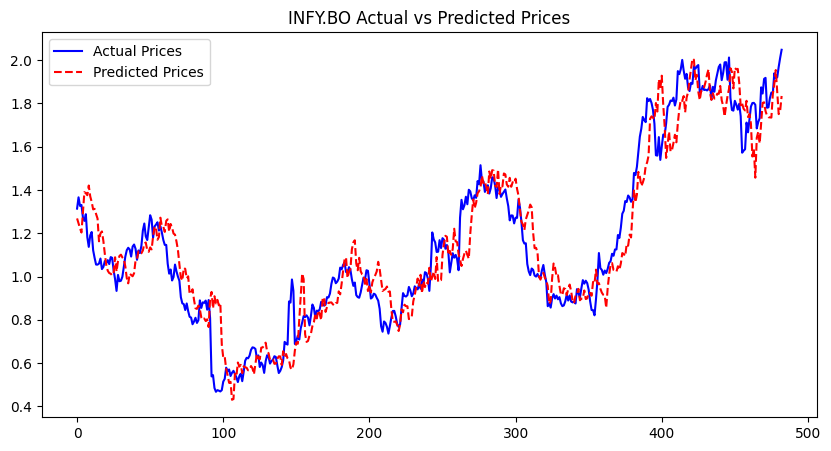

Processing HDFCBANK.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Close': 'price'}, inplace=True)
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
<ipython-input-1-2173c8513743>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
HDFCBANK.BO RMSE: 0.1409147613749549


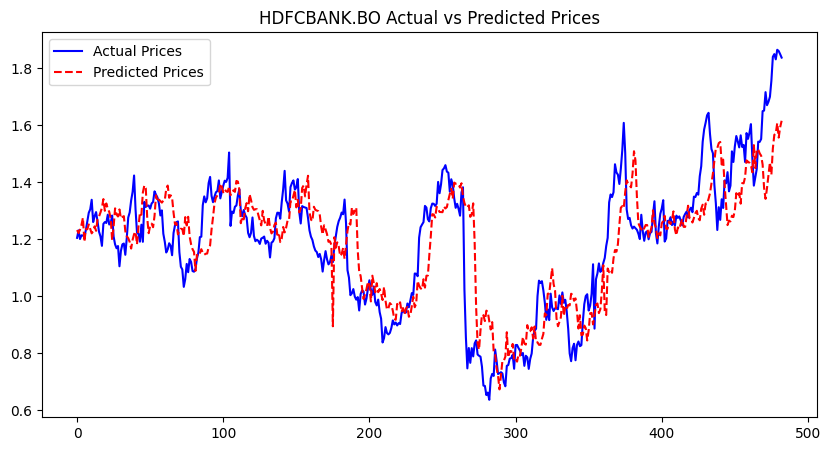

Processing HDFC.BO...


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDFC.BO']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No data available for HDFC.BO. Skipping.
Processing ICICIBANK.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
ICICIBANK.BO RMSE: 0.11871493758359516


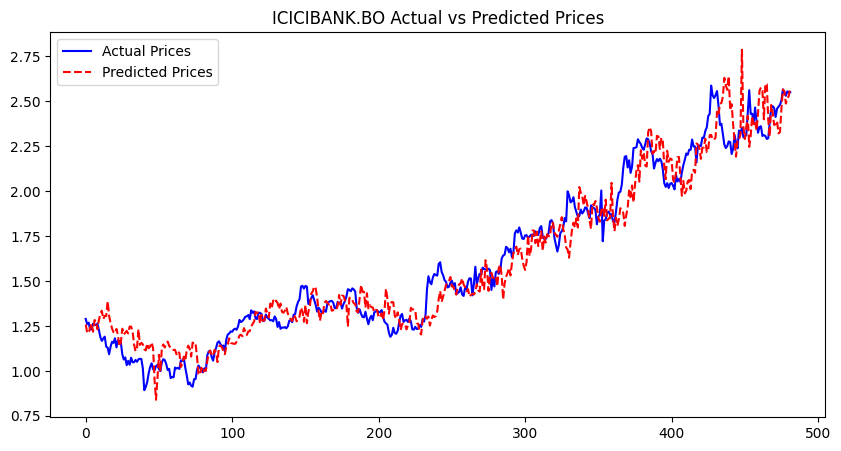

Processing SBIN.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
SBIN.BO RMSE: 0.16937199128643352


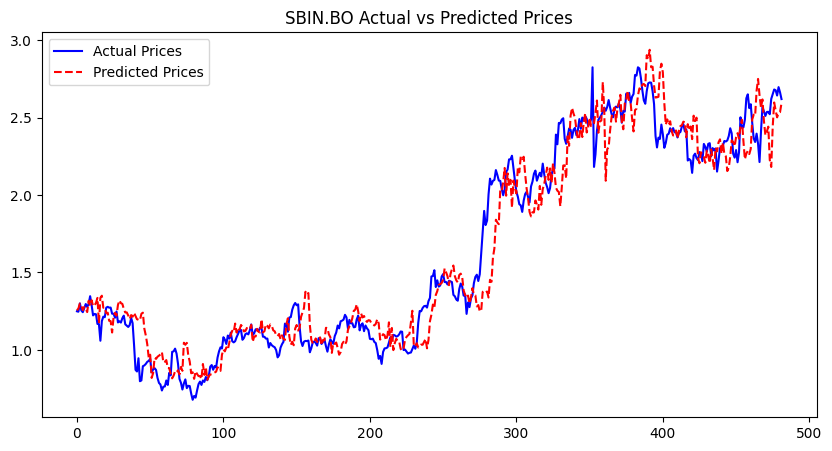

Processing AXISBANK.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
AXISBANK.BO RMSE: 0.4166148530535907


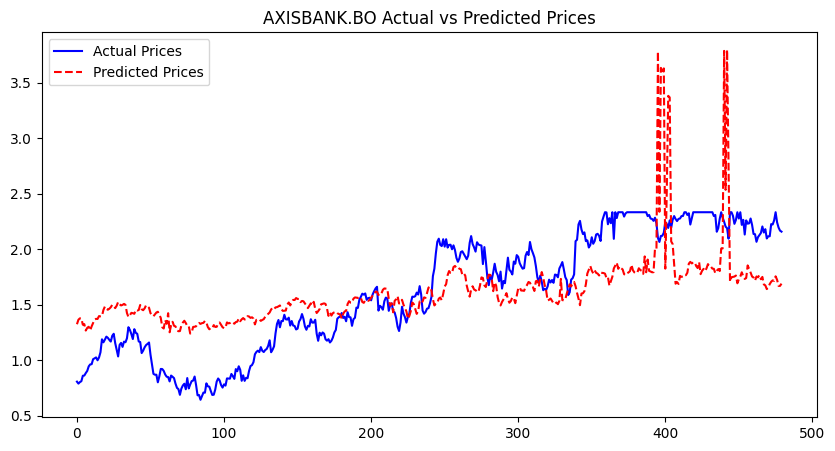

Processing KOTAKBANK.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
KOTAKBANK.BO RMSE: 0.11312728593720264


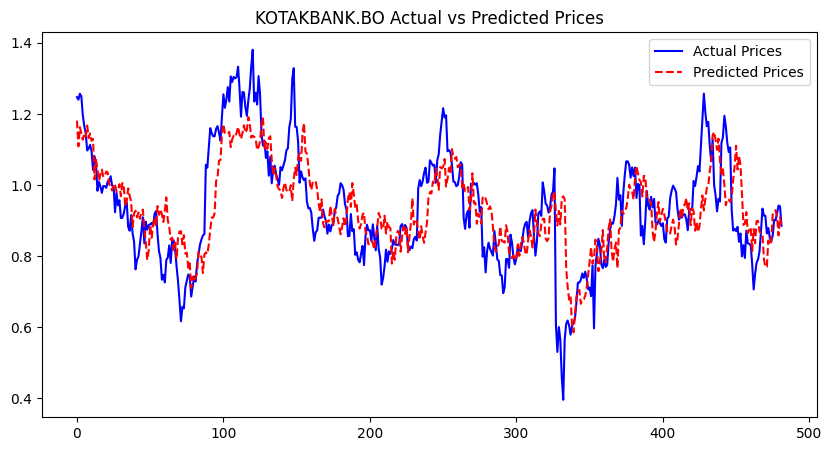

Processing ITC.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
ITC.BO RMSE: 0.22494943508935095


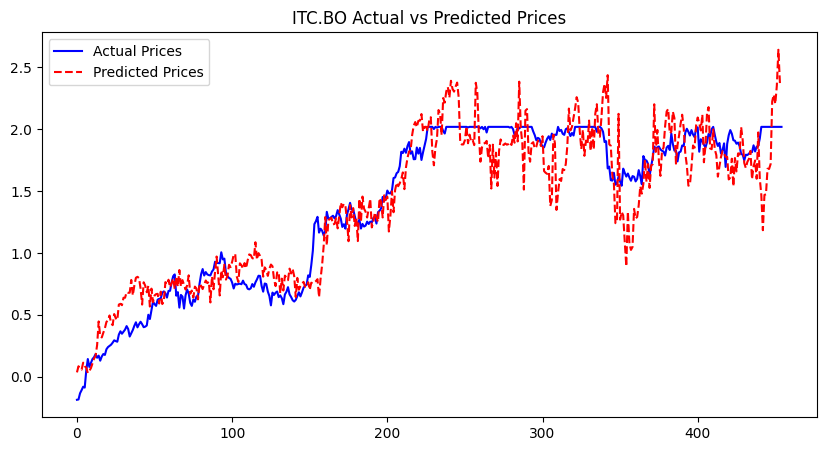

Processing LT.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
LT.BO RMSE: 0.17446290854851834


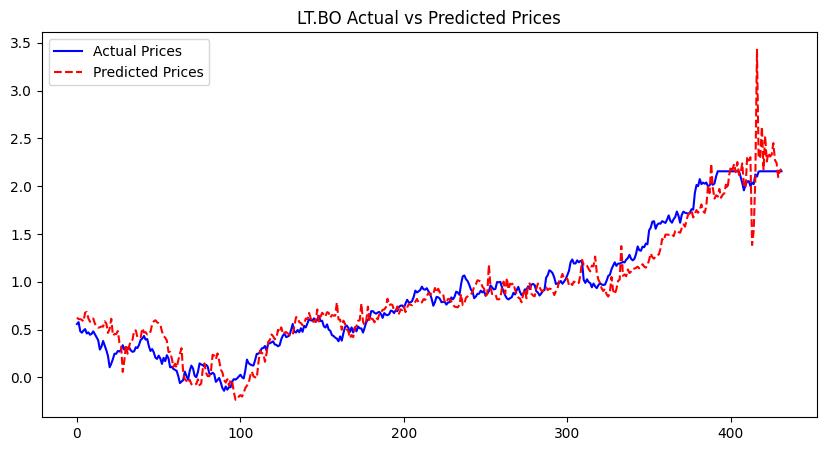

Processing BHARTIARTL.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
BHARTIARTL.BO RMSE: 0.15042317042582998


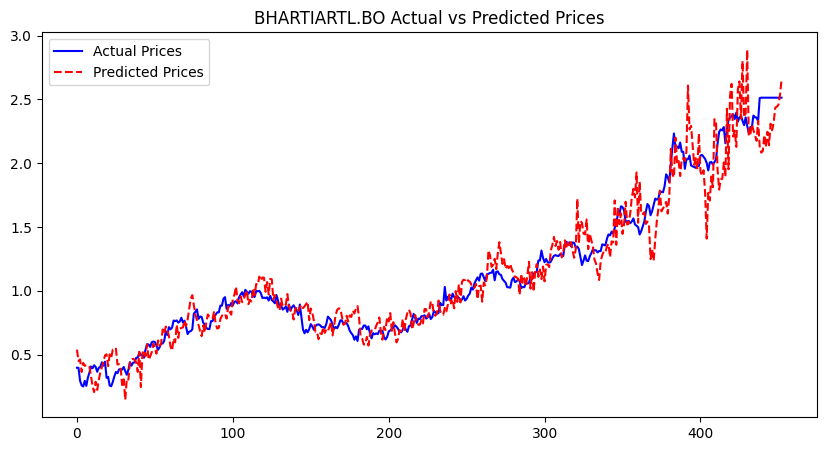

Processing HINDUNILVR.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
HINDUNILVR.BO RMSE: 0.11079897723788676


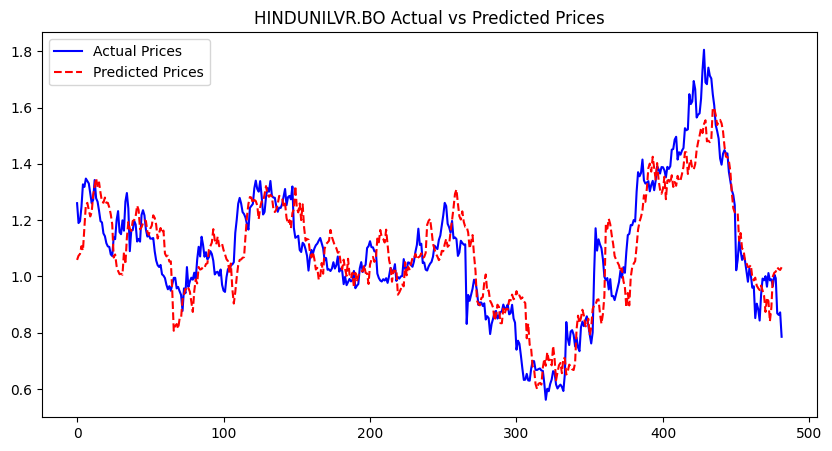

Processing ASIANPAINT.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
ASIANPAINT.BO RMSE: 0.11750319520546196


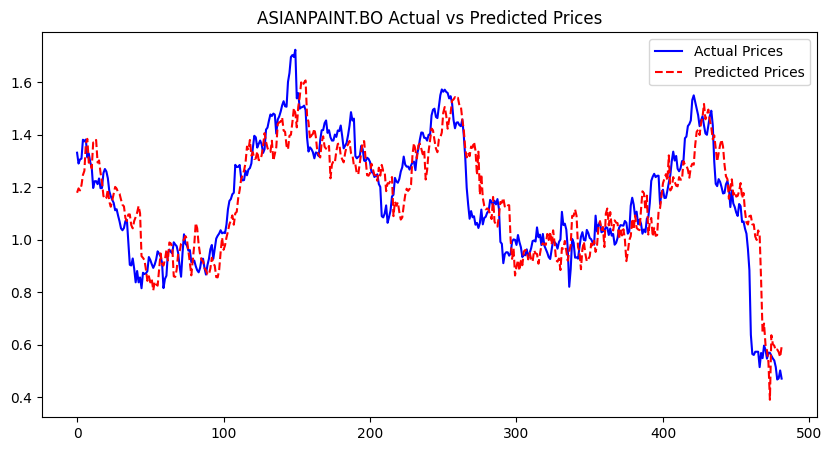

Processing MARUTI.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
MARUTI.BO RMSE: 0.256259088297346


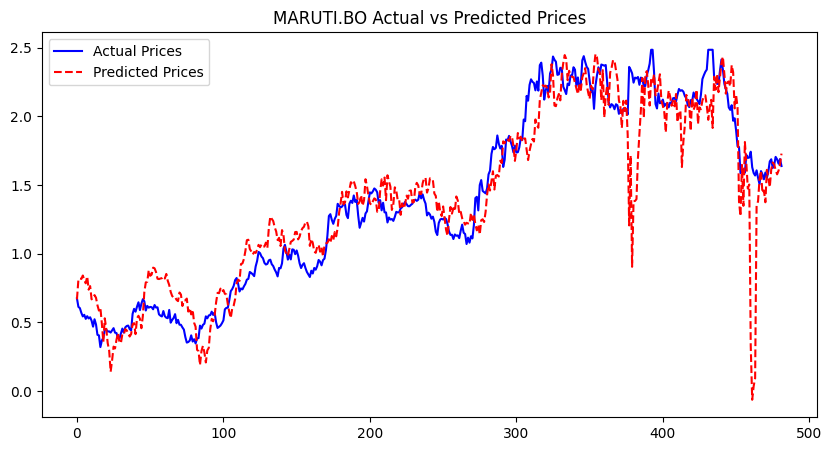

Processing TATAMOTORS.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
TATAMOTORS.BO RMSE: 0.17234269552650927


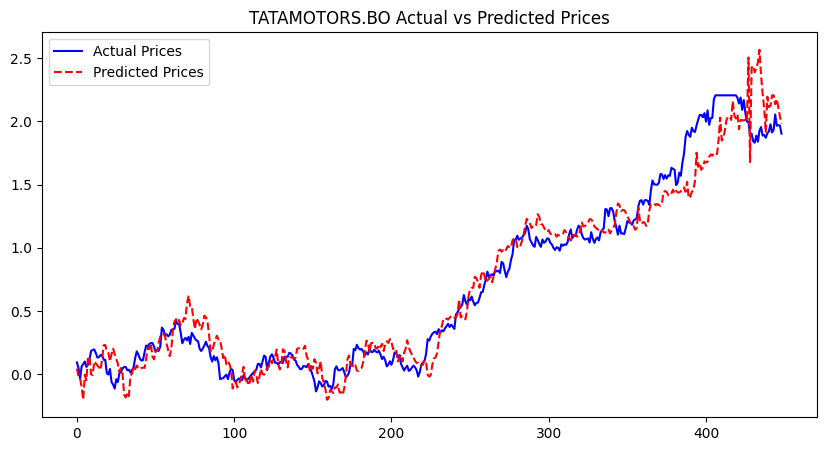

Processing HCLTECH.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
HCLTECH.BO RMSE: 0.1289782361668186


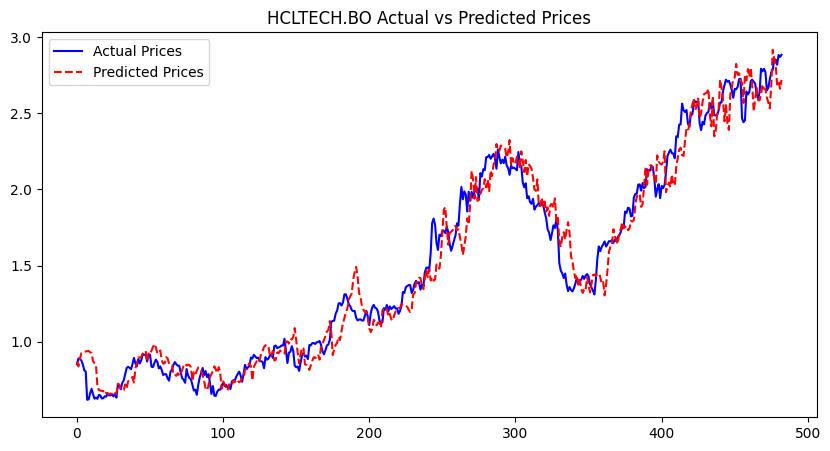

Processing WIPRO.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
WIPRO.BO RMSE: 0.13154103326999808


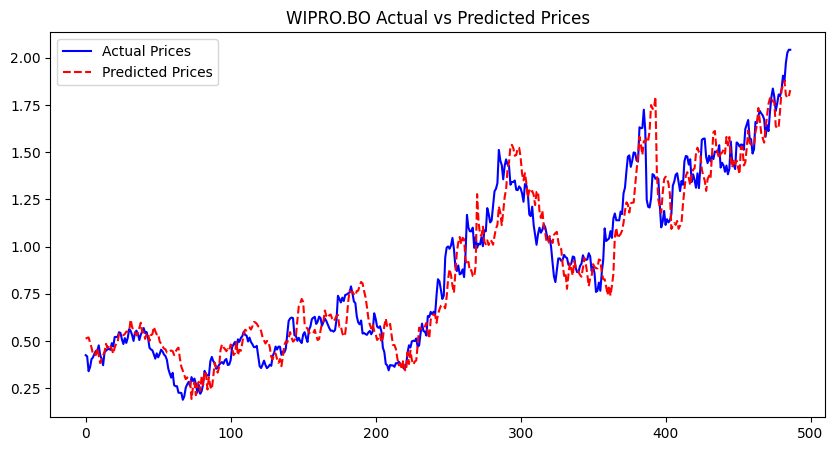

Processing SUNPHARMA.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
SUNPHARMA.BO RMSE: 0.12748322407843615


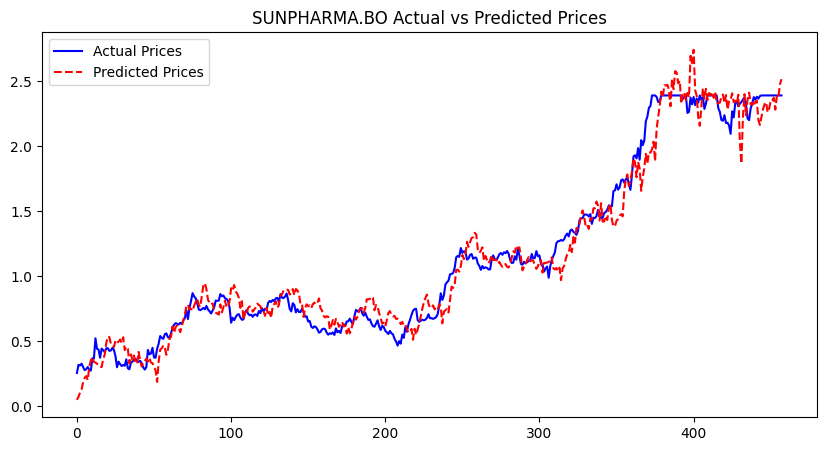

Processing DRREDDY.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
DRREDDY.BO RMSE: 0.20551952136483242


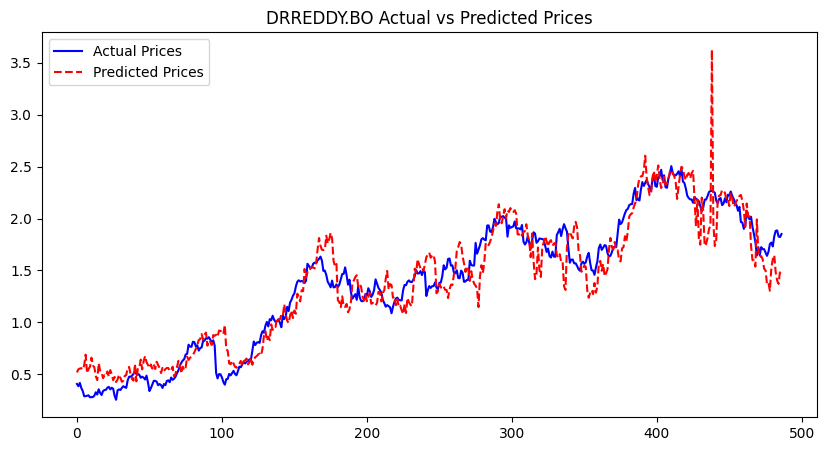

Processing DIVISLAB.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
DIVISLAB.BO RMSE: 0.13621657331692294


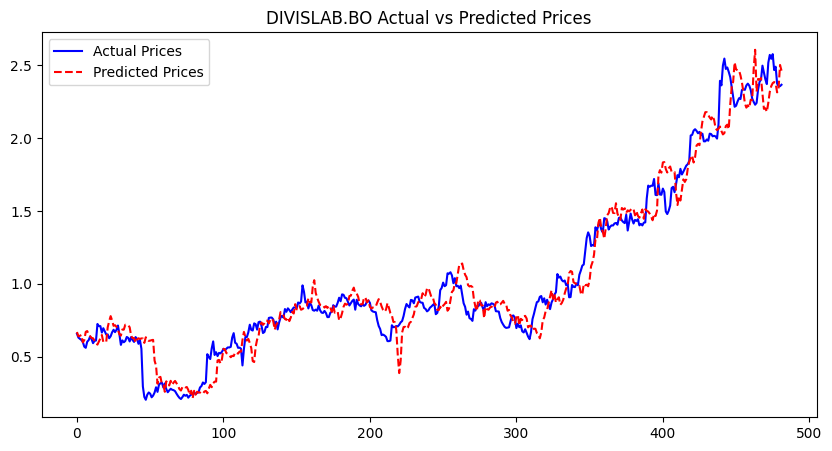

Processing BAJFINANCE.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
BAJFINANCE.BO RMSE: 0.10920303238040907


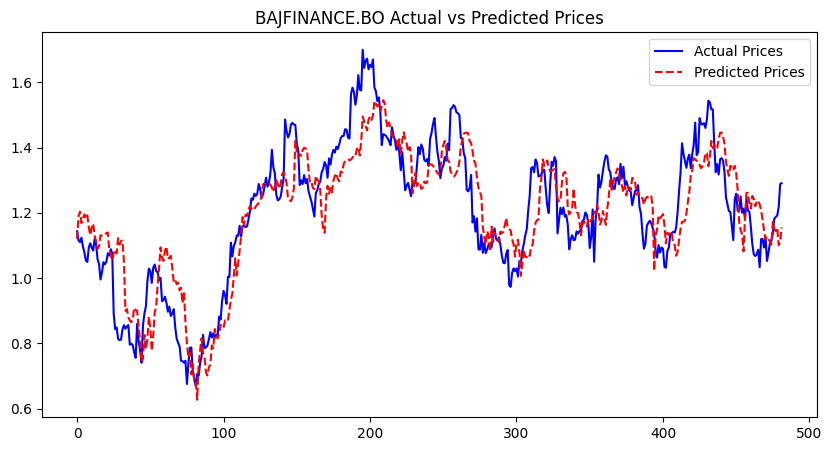

Processing BAJAJFINSV.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
BAJAJFINSV.BO RMSE: 0.12369128030463457


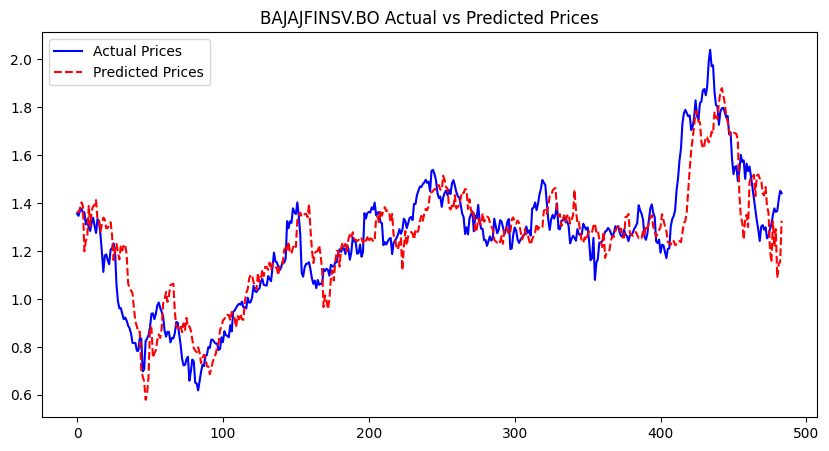

Processing POWERGRID.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
POWERGRID.BO RMSE: 0.1453068342538907


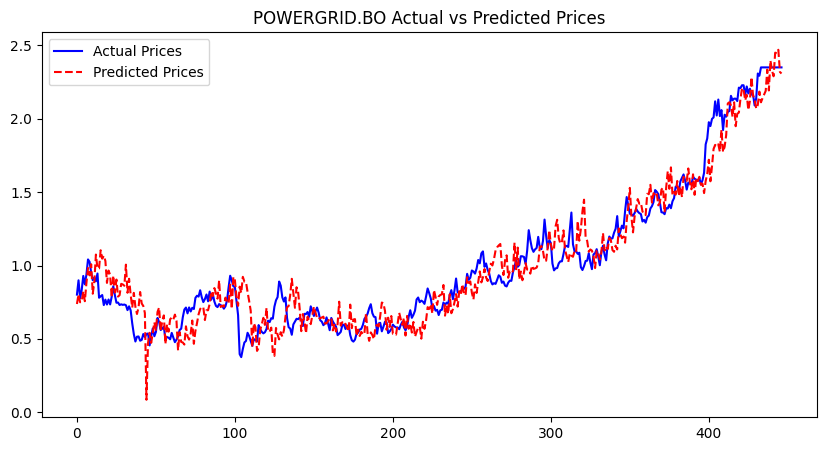

Processing NTPC.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
NTPC.BO RMSE: 0.25389574933516246


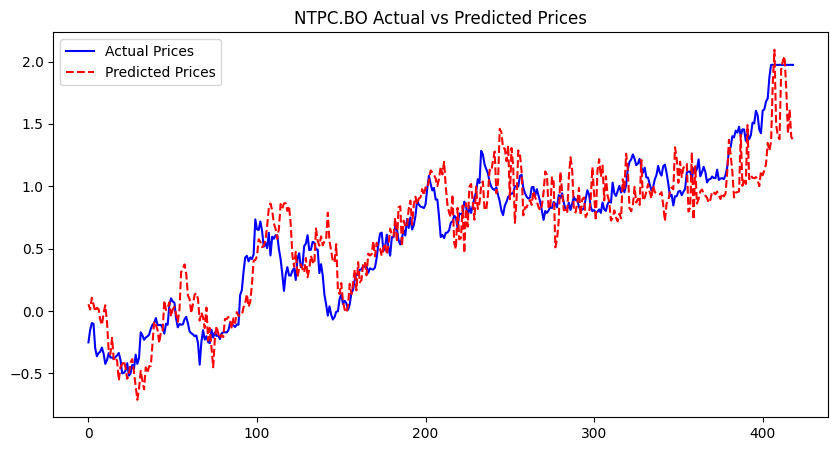

Processing ONGC.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
ONGC.BO RMSE: 0.17472022736319484


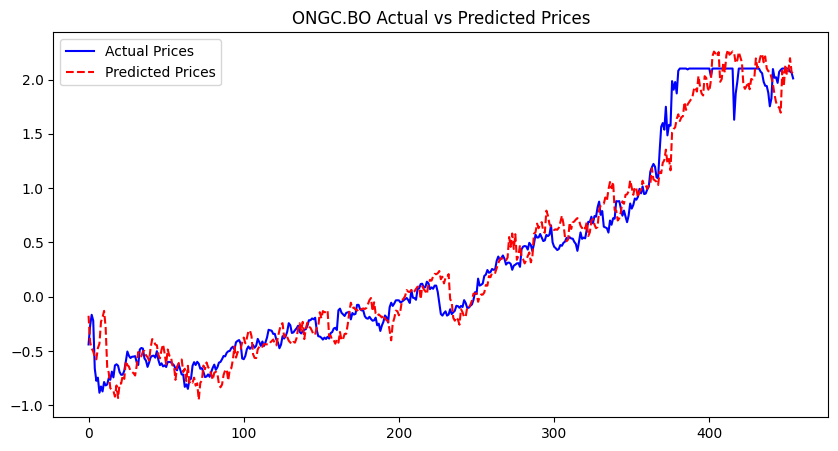

Processing BPCL.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
BPCL.BO RMSE: 0.25992374471635693


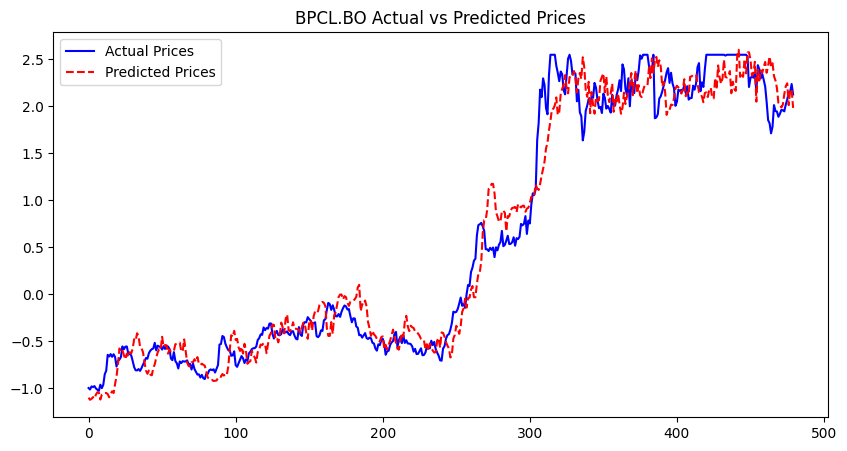

Processing IOC.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
IOC.BO RMSE: 0.190536228055946


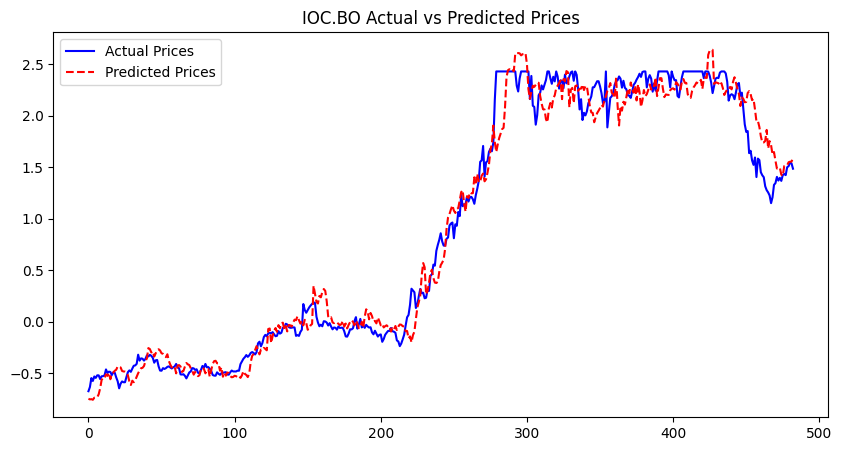

Processing M&M.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
M&M.BO RMSE: 0.47087494666674506


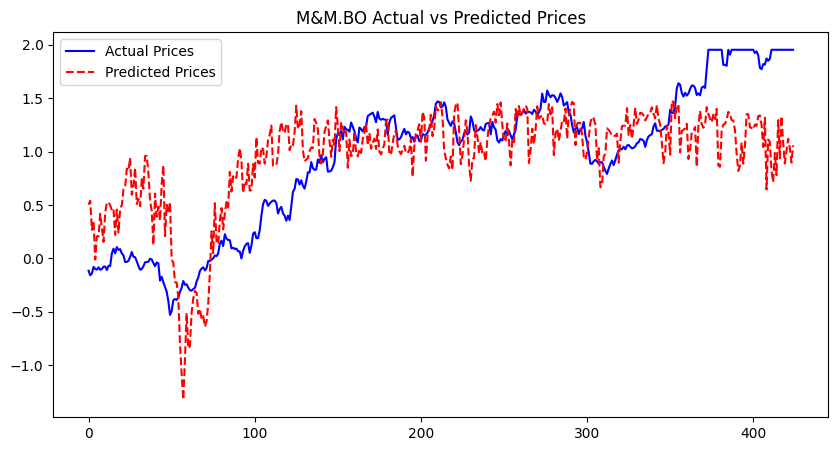

Processing HEROMOTOCO.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
HEROMOTOCO.BO RMSE: 0.189267133342144


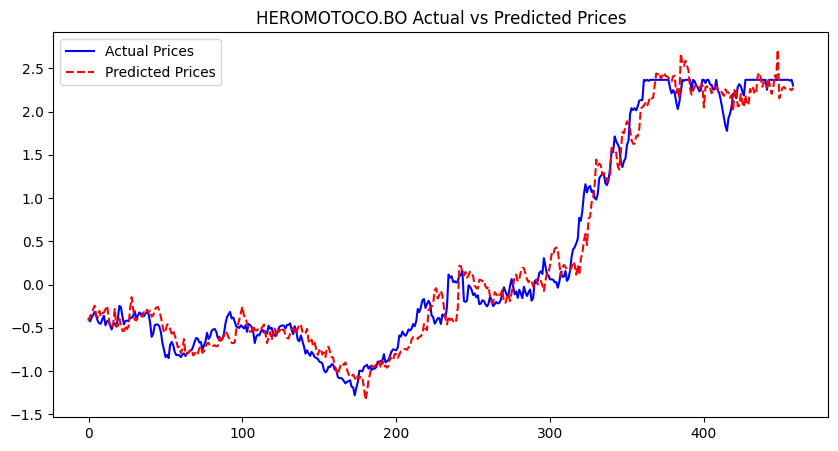

Processing EICHERMOT.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
EICHERMOT.BO RMSE: 0.1732027600878749


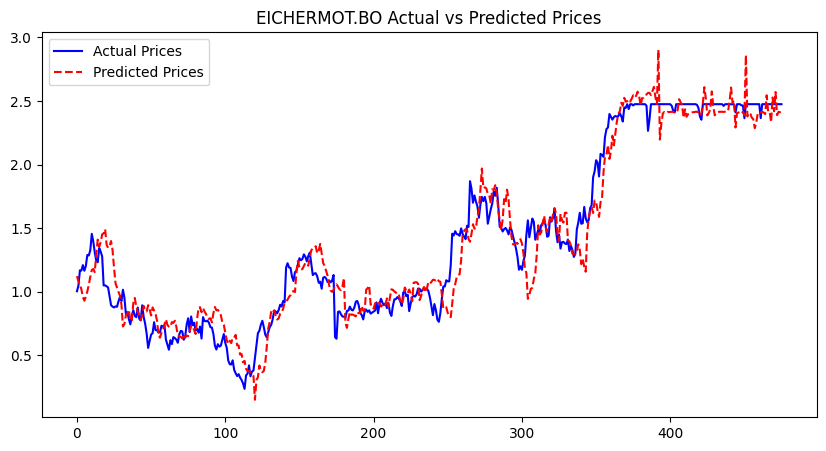

Processing BAJAJ-AUTO.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
BAJAJ-AUTO.BO RMSE: 0.2087859024996479


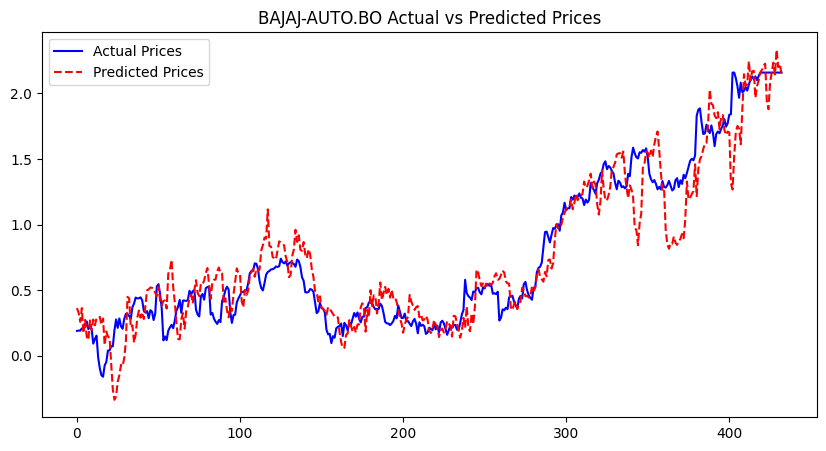

Processing JSWSTEEL.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
JSWSTEEL.BO RMSE: 0.1310514317726519


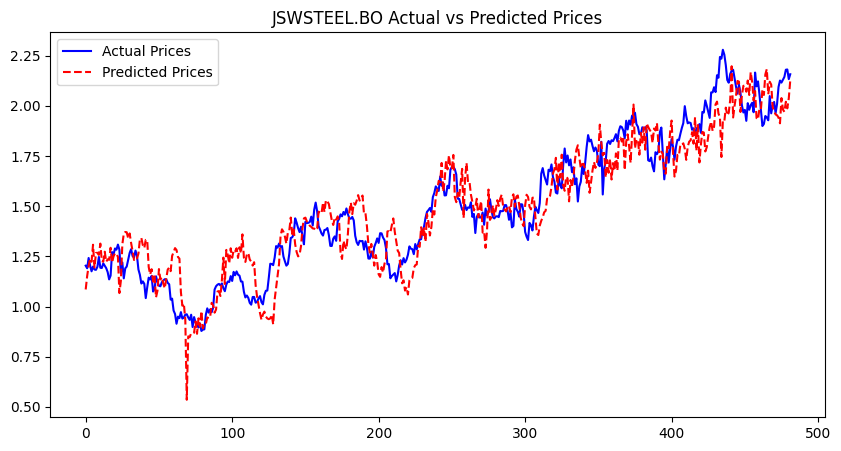

Processing TATASTEEL.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
TATASTEEL.BO RMSE: 0.14905279201637311


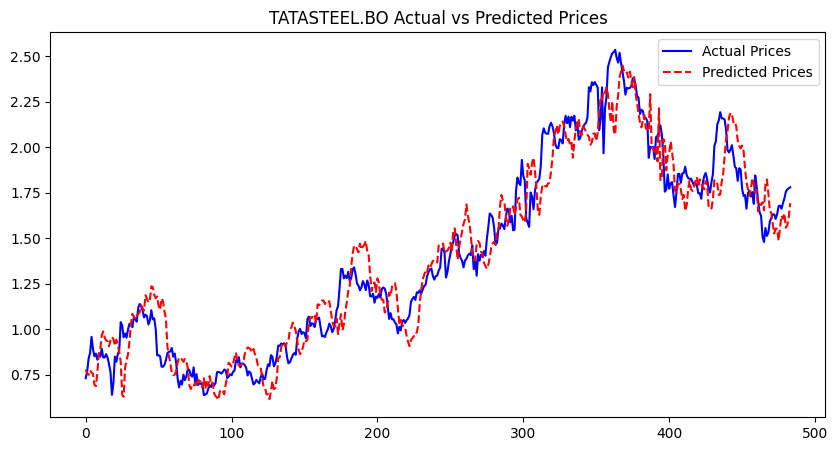

Processing HINDALCO.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
HINDALCO.BO RMSE: 0.175558910819113


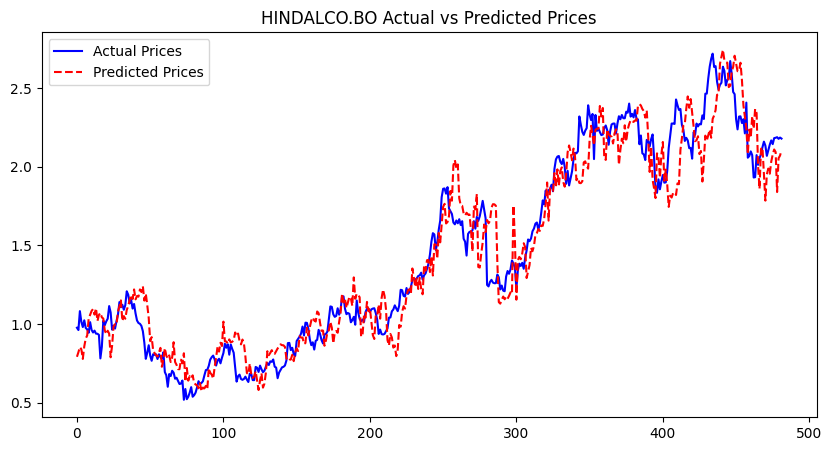

Processing COALINDIA.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step
COALINDIA.BO RMSE: 0.25291626934544104


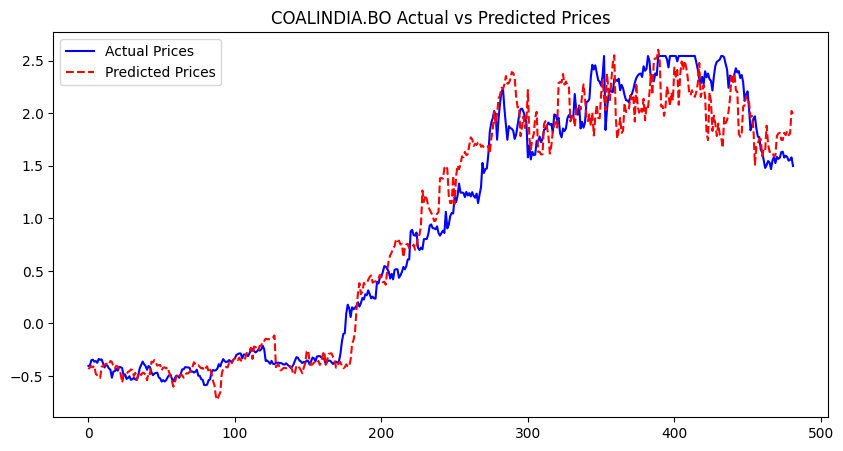

Processing TECHM.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
TECHM.BO RMSE: 0.14770050222409245


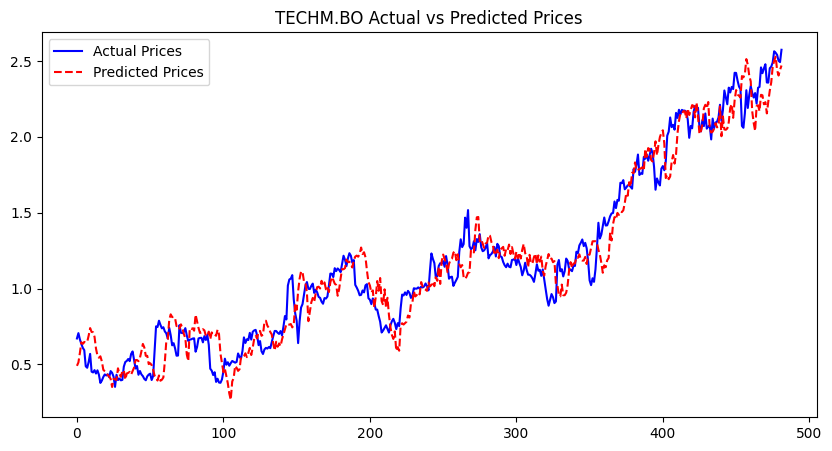

Processing PIDILITIND.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
PIDILITIND.BO RMSE: 0.10351283497926327


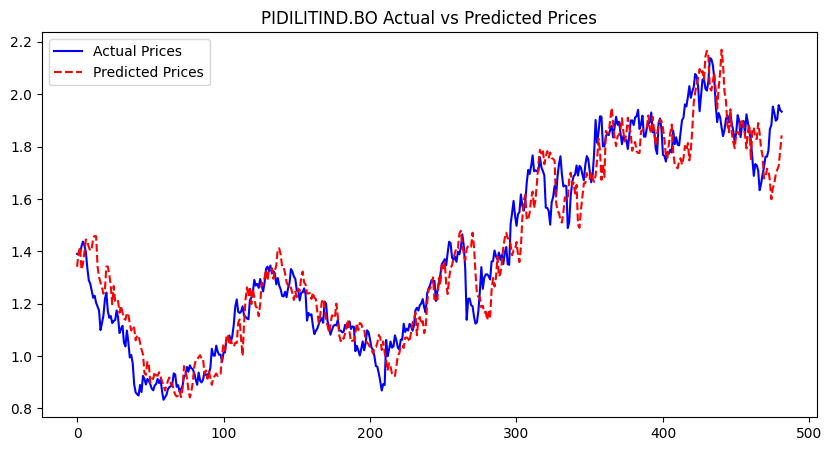

Processing DABUR.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
DABUR.BO RMSE: 0.15724486593770437


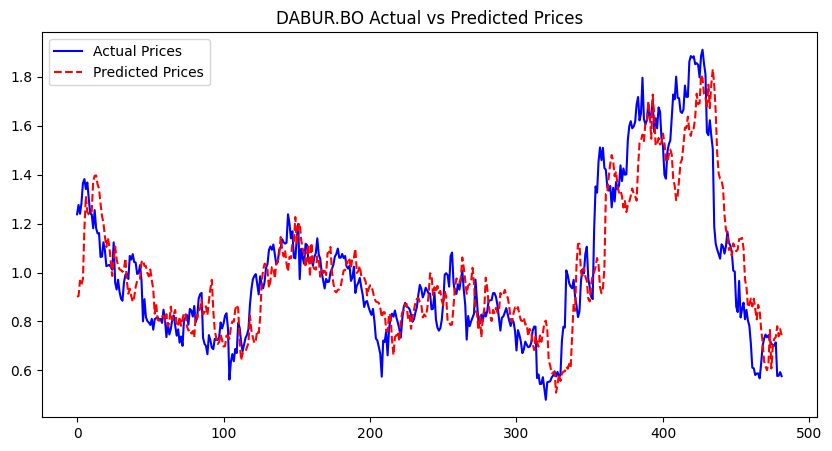

Processing BRITANNIA.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
BRITANNIA.BO RMSE: 0.13927706323176067


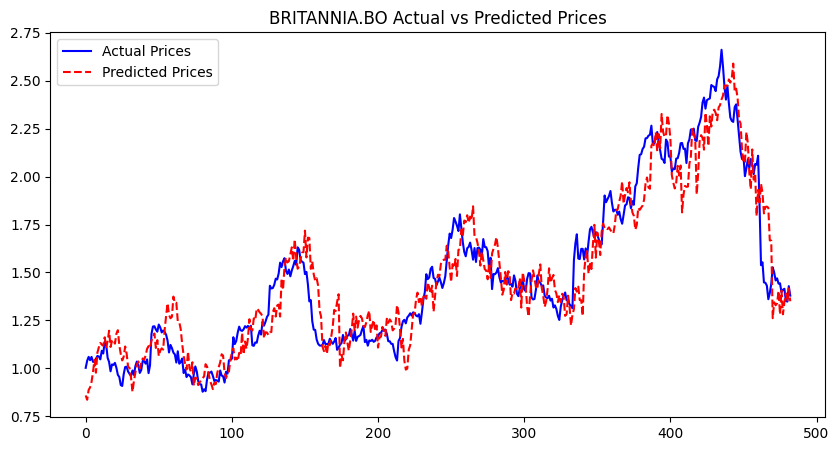

Processing ULTRACEMCO.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
ULTRACEMCO.BO RMSE: 0.18114755353374945


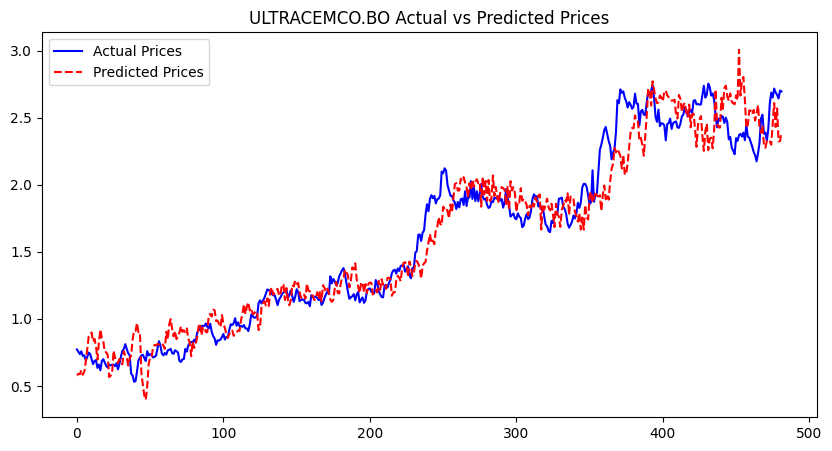

Processing SHREECEM.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
SHREECEM.BO RMSE: 0.18119844683242714


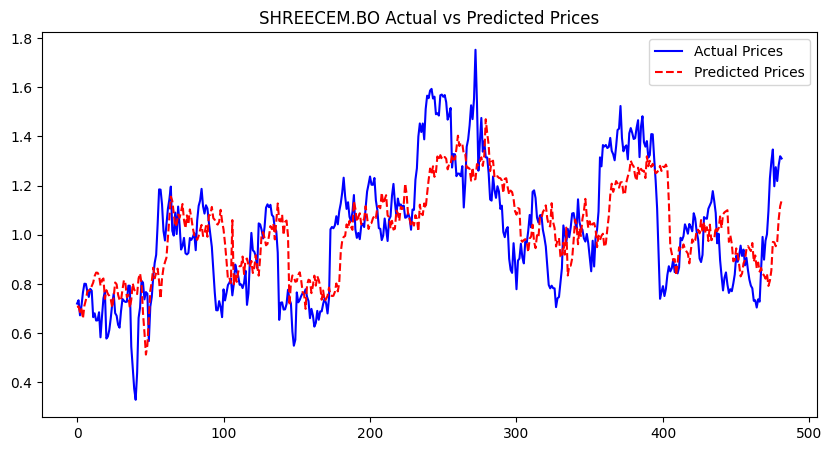

Processing ADANIPORTS.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
ADANIPORTS.BO RMSE: 0.30929177989329504


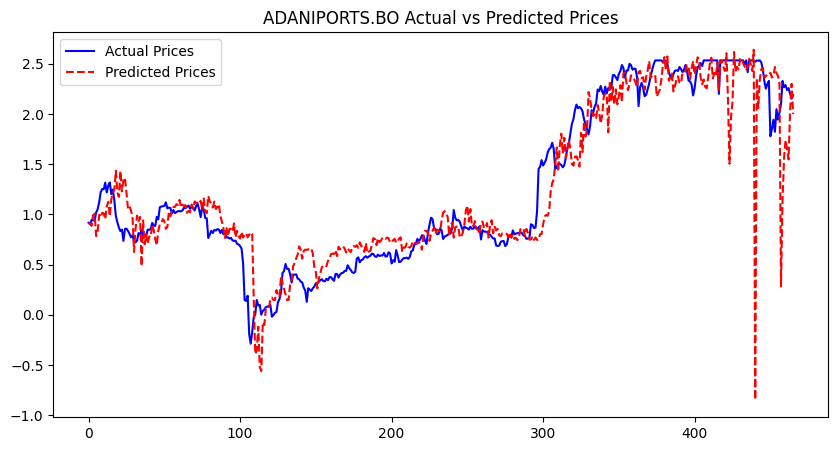

Processing ADANIGREEN.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
ADANIGREEN.BO RMSE: 0.1837880295861416


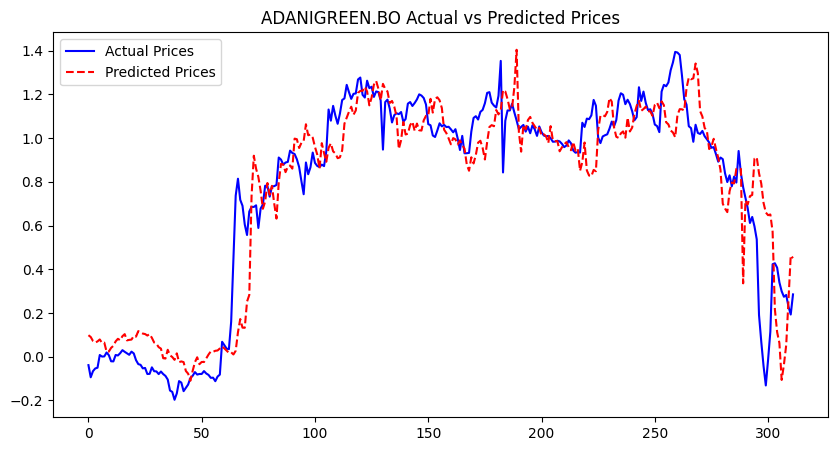

Processing ADANIENT.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
ADANIENT.BO RMSE: 0.22234032205855914


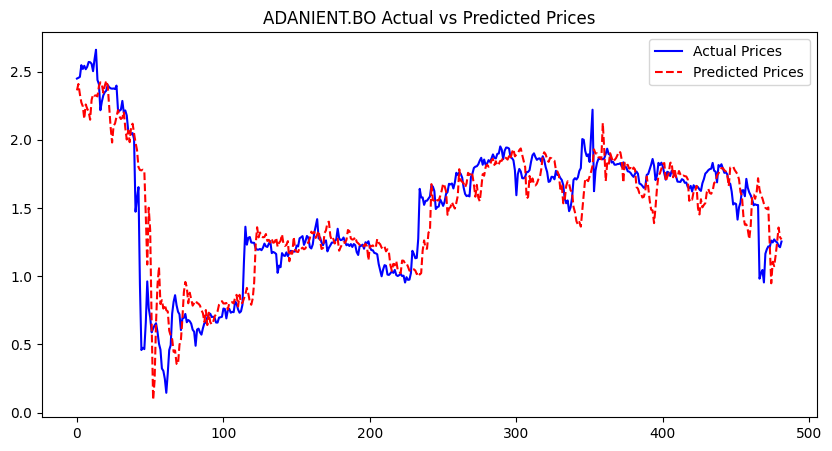

Processing ZEEL.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
ZEEL.BO RMSE: 0.14082061262140316


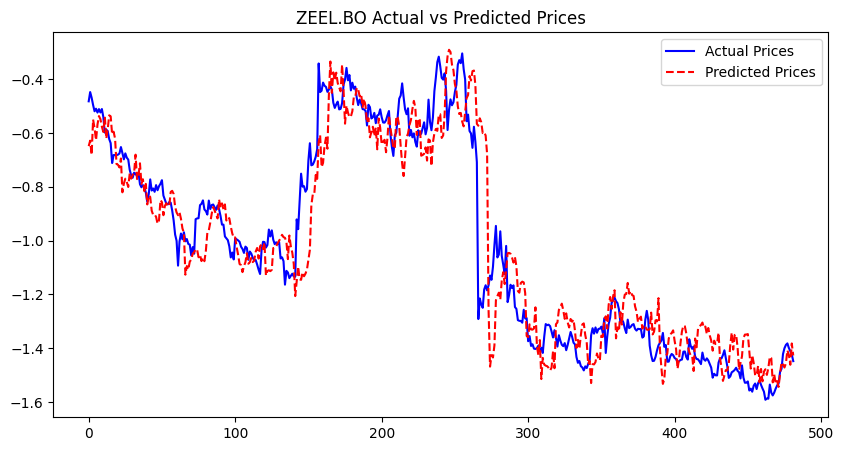

Processing CIPLA.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
CIPLA.BO RMSE: 0.18572231407444417


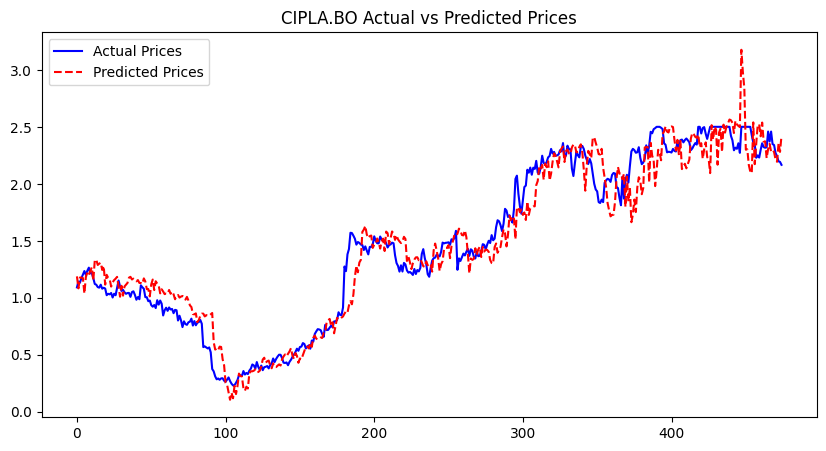

Processing INDUSINDBK.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
INDUSINDBK.BO RMSE: 0.17573001528540738


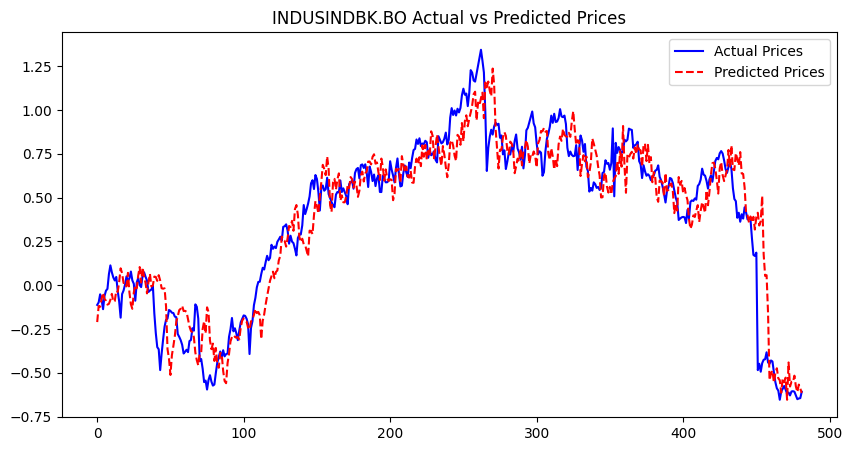

Processing GRASIM.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
GRASIM.BO RMSE: 0.15064237572348735


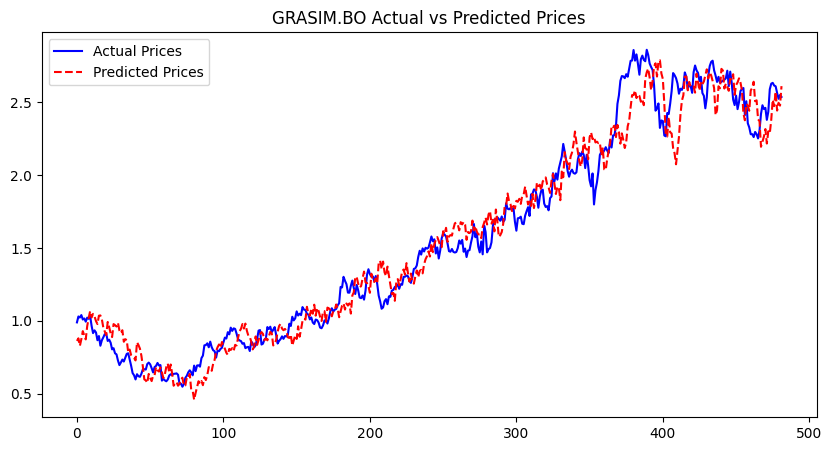

Processing TITAN.BO...


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-2173c8513743>:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
TITAN.BO RMSE: 0.11515045689666831


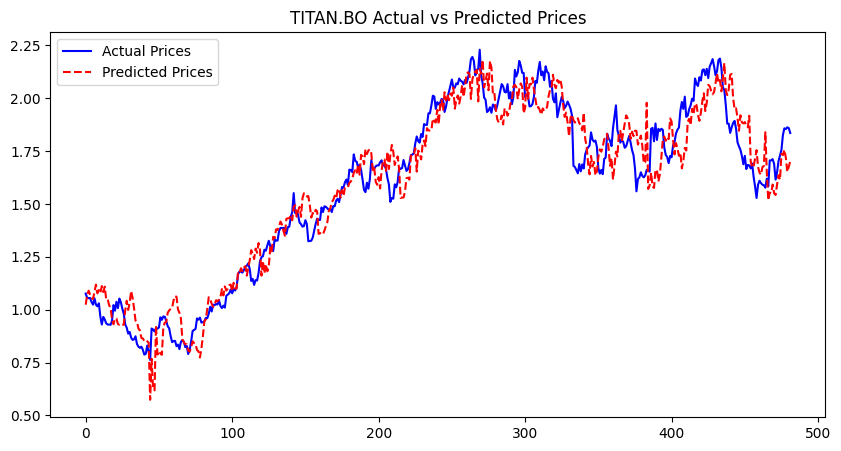

Processing completed. Results saved to stock_predictions_results.csv.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# List of 50 Indian companies' ticker symbols
indian_ticker_symbols = [
    "RELIANCE.BO", "TCS.BO", "INFY.BO", "HDFCBANK.BO", "HDFC.BO",
    "ICICIBANK.BO", "SBIN.BO", "AXISBANK.BO", "KOTAKBANK.BO", "ITC.BO",
    "LT.BO", "BHARTIARTL.BO", "HINDUNILVR.BO", "ASIANPAINT.BO", "MARUTI.BO",
    "TATAMOTORS.BO", "HCLTECH.BO", "WIPRO.BO", "SUNPHARMA.BO", "DRREDDY.BO",
    "DIVISLAB.BO", "BAJFINANCE.BO", "BAJAJFINSV.BO", "POWERGRID.BO", "NTPC.BO",
    "ONGC.BO", "BPCL.BO", "IOC.BO", "M&M.BO", "HEROMOTOCO.BO",
    "EICHERMOT.BO", "BAJAJ-AUTO.BO", "JSWSTEEL.BO", "TATASTEEL.BO", "HINDALCO.BO",
    "COALINDIA.BO", "TECHM.BO", "PIDILITIND.BO", "DABUR.BO", "BRITANNIA.BO",
    "ULTRACEMCO.BO", "SHREECEM.BO", "ADANIPORTS.BO", "ADANIGREEN.BO", "ADANIENT.BO",
    "ZEEL.BO", "CIPLA.BO", "INDUSINDBK.BO", "GRASIM.BO", "TITAN.BO"
]

# Function to build the GRU and LSTM models
def build_deep_learning_model(input_shape):
    input_layer = Input(shape=(input_shape, 1))

    # GRU block
    gru_output = GRU(32, activation='relu', return_sequences=False)(input_layer)

    # LSTM block
    lstm_output = LSTM(32, activation='relu', return_sequences=False)(input_layer)

    # Sum outputs
    combined = Dense(32, activation='relu')(gru_output + lstm_output)
    output = Dense(1)(combined)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # For GRU

    return model

# Dictionary to store results for each ticker
results = {}

for ticker in indian_ticker_symbols:
    print(f"Processing {ticker}...")

    # Fetch Stock Data
    data = yf.download(ticker, start="2015-01-01", end="2024-12-13")
    if data.empty:
        print(f"No data available for {ticker}. Skipping.")
        continue
    data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    data.rename(columns={'Close': 'price'}, inplace=True)
    data.fillna(method='ffill', inplace=True)

    # Preprocessing
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data.clip(lower=(Q1 - 1.5 * IQR), upper=(Q3 + 1.5 * IQR), axis=1)
    scaler = StandardScaler()
    data[['Open', 'High', 'Low', 'price', 'Volume']] = scaler.fit_transform(data[['Open', 'High', 'Low', 'price', 'Volume']])

    # Add Technical Indicators
    data['moving_avg'] = data['price'].rolling(window=5).mean()
    delta = data['price'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['rsi'] = 100 - (100 / (1 + rs))
    data['volatility'] = data['price'].rolling(window=5).std()
    data.dropna(inplace=True)

    # Target for 7-day price prediction
    data['target'] = data['price'].shift(-7)
    data.dropna(inplace=True)

    features = ['Open', 'High', 'Low', 'Volume', 'moving_avg', 'rsi', 'volatility']
    X = data[features].values
    y = data['target'].values

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
    lgb_train = lgb.Dataset(X_train, label=y_train)

    # Build and Train Models
    X_deep = X_train.reshape(-1, X_train.shape[1], 1)  # Reshape for GRU/LSTM
    gru_model = build_deep_learning_model(X_train.shape[1])
    gru_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=0)

    lstm_model = build_deep_learning_model(X_train.shape[1])
    lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mae')  # Correlation Loss (approximation)
    lstm_model.fit(X_deep, y_train, epochs=20, batch_size=16, verbose=0)

    lgb_params = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.01,
        'num_leaves': 31,
        'verbose': -1
    }
    lgbm_model = lgb.train(lgb_params, lgb_train, num_boost_round=500)

    # Evaluate Models
    gru_preds = gru_model.predict(X_test.reshape(-1, X_test.shape[1], 1))
    lstm_preds = lstm_model.predict(X_test.reshape(-1, X_test.shape[1], 1))
    lgbm_preds = lgbm_model.predict(X_test)

    # Linear Regression Integration
    combined_features = np.column_stack((gru_preds, lstm_preds, lgbm_preds))
    lr_model = LinearRegression()
    lr_model.fit(combined_features, y_test)
    final_preds = lr_model.predict(combined_features)

    rmse = np.sqrt(mean_squared_error(y_test, final_preds))
    print(f"{ticker} RMSE: {rmse}")

    # Save Results
    results[ticker] = {
        'RMSE': rmse,
        'Actuals': y_test,
        'Predictions': final_preds
    }

    # Plot Results
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(y_test)), y_test, label="Actual Prices", color="blue")
    plt.plot(range(len(final_preds)), final_preds, label="Predicted Prices", color="red", linestyle="--")
    plt.legend()
    plt.title(f"{ticker} Actual vs Predicted Prices")
    plt.show()

# Save all results to a CSV or any preferred format
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv('stock_predictions_results.csv')
print("Processing completed. Results saved to stock_predictions_results.csv.")
